# Data Profiling and Cleaning

We profiled and cleaned the NYC opendata `DOB Job Application Filings` data using pandas and openclean

Run all the cells in order to profile and clean the data

Robert Ronan, Sheng Tong, Jerry Lee

In [1]:
import openclean
import glob
import pandas as pd
import numpy as np
import re

# Data Downloading

Download the data using openClean

In [2]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('iz2q-9x8d')
datafile = './iz2q-9x8d.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'DOB Cellular Antenna Filings' in file ./iz2q-9x8d.tsv.gz of size 711.77 KB


# Data Loading

Load the data into pandas and openClean dataset object

In [3]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile)

In [4]:
np.__version__

'1.21.3'

In [5]:
pd.__version__

'1.3.4'

In [6]:
import glob

In [7]:
glob.glob("*")

['DOB_Job_Application_Filings.csv',
 'DOB_Job_Cleaning.ipynb',
 'DOB_Job_Cleaning_Cellular_Antenna_Filings-Copy1.ipynb',
 'DOB_Job_Cleaning_Cellular_Antenna_Filings.ipynb',
 'DOB_Job_Cleaning_Facades_Compliance_Filings_rr.ipynb',
 'DOB_Job_Cleaning_Open_Restaurant_Applications_rr.ipynb',
 'DOB_Job_Cleaning_Permit_Issuance_rr.ipynb',
 'ic3t-wcy2.tsv.gz',
 'ipu4-2q9a.tsv.gz',
 'iz2q-9x8d.tsv.gz',
 'pitm-atqc.tsv.gz',
 'README.md',
 'xubg-57si.tsv.gz']

### Get some basic info about the dataset columns

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Job #                         6090 non-null   object
 1   Doc #                         6090 non-null   object
 2   Borough                       6068 non-null   object
 3   House #                       6028 non-null   object
 4   Street Name                   6003 non-null   object
 5   Block                         5997 non-null   object
 6   Lot                           5992 non-null   object
 7   Bin #                         5991 non-null   object
 8   Job Type                      5990 non-null   object
 9   Job Status                    5990 non-null   object
 10  Job Status Descrp             5990 non-null   object
 11  Latest Action Date            5990 non-null   object
 12  Building Type                 5990 non-null   object
 13  Community - Board 

If any rows are complete duplicates, drop them

In [9]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [10]:
df

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street,City,State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOBRunDate
0,321410745,01,3,96,SCHERMERHORN STREET,00271,00047,3002707,A3,R,...,DOUGLAS ELLIMAN PROPERTY MANAGEM,96,SCHERMERHORN STREET,BROOKLYN,NY,11201,7188474820,08/16/2016 12:00:00 AM,INSTALLATION OF MICROWAVE DISH ON ROOF. ALL IN...,08/17/2016 00:00:00
1,122711903,01,1,210,SOUTH STREET,00250,00001,1003205,A3,R,...,"EDISON PROPERTIES, LLC",100,WASHINGTON STREET,NEWARK,NJ,07102,9738492613,08/16/2016 12:00:00 AM,REPLACEMENT OF EXISTING TELECOMMUNICATION ANTE...,08/17/2016 00:00:00
2,122282010,01,1,143,11 AVENUE,00662,00062,1012258,A3,R,...,"CHELSEA PIERS, LP",62,CHELSEA PIERS,NEW YORK,NY,10011,9733974814,08/16/2016 12:00:00 AM,INSTALLATION OF RRU UNITS ON THE ROOF. RETROFI...,08/17/2016 00:00:00
3,220535151,01,2,3103,THIRD AVE,02380,00051,2102501,A3,R,...,LA PUERTA DE VITALIDAD HOUSING,902,BROADWAY,NEW YORK,NY,10025,2122439090,08/16/2016 12:00:00 AM,"INSTALL NEW TELECOMMUNICATIONS CABINETS, RELAT...",08/17/2016 00:00:00
4,321369620,01,3,329,UNION STREET,00428,00049,3007041,A3,R,...,"ICON REALTY MANAGEMENT, LLC",419,LAFAYETTE STREET,NEW YORK,NY,10003,2126612700,08/17/2016 12:00:00 AM,INSTALLATION OF TELECOMMUNICATION ANTENNAS AND...,08/18/2016 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,240288817,01,2,840,EAST 226 STREET,04850,00066,2063908,A3,R,...,T-MOBILE,4,SYLVAN WAY,PARSIPPANY,NJ,07054,9738791375,11/23/2020 12:00:00 AM,DECOMMISSION OF EXISTING TELECOMMUNICATIONS SI...,11/24/2020 00:00:00
6086,340781899,01,3,946,BUSHWICK AVENUE,03294,00016,3075292,A3,R,...,T-MOBILE,4,SYLVAN WAY,PARSIPPANY,NJ,07054,9738791375,01/08/2021 12:00:00 AM,DECOMMISSION OF EXISTING TELECOMMUNICATIONS SI...,01/09/2021 00:00:00
6087,440652214,01,4,42-24,ORCHARD STREET,00265,00001,4003482,A3,R,...,BLDG ORCHARD LLC,417,FIFTH AVENUE,NEW YORK,NY,10016,2126244300,01/19/2021 12:00:00 AM,DECOMMISSION OF EXISTING TELECOMMUNICATIONS SI...,01/20/2021 00:00:00
6088,123039069,01,1,80,RIVERSIDE DRIVE,01244,00033,1033732,A3,R,...,COSMOPOLITAN BROADCASTING CORP,80,RIVERSIDE DRIVE,NEW YORK,NY,10024,2128775200,02/19/2021 12:00:00 AM,INSTALLATION OF TELECOMMUNICATION ANTENNAS ON ...,02/20/2021 00:00:00


## Describe columns in groups so they fit on screen

In [11]:
df[df.columns[:20]].describe()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Landmarked,Little e,PC Filed,Other,Other Description,Applicant's First Name
count,6064,6064,6042,6002,5977,5971,5966,5965,5964,5964,5964,5964,5964,5963,308,29,5963,5963,5963,5963
unique,6026,74,66,2447,2185,2862,283,4076,2,2,2,1145,3,62,1,1,1,1,3,60
top,122554280,01,1,2,BROADWAY,02139,00001,1034515,A3,R,PERMIT ISSUED - ENTIRE JOB/WORK,06/08/2015 00:00:00,OTHER,105,Y,H,,X,ANTENNA,STEPHEN
freq,2,5963,2151,41,121,15,1001,8,5963,5963,5963,36,5958,391,308,29,5963,5963,5961,832


In [12]:
# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Establishment looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN


In [13]:
df[df.columns[20:40]].describe()

,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Occupancy,Proposed Occupancy,Zoning Distr 1,Zoning Distr 2,Zoning Distr 3,Special Distr 1,Special Distr 2
count,5963,5963,5963,39,5963,5963,5963,5884,5963,5963,5963,5963,5963,5963,5963,5963,778,17,1168,321
unique,81,2,83,1,1065,1060,1059,1158,1258,1144,360,131,2,36,36,135,85,12,49,7
top,BRAY,PE,086064,Y,05/22/2015 12:00:00 AM,05/22/2015 12:00:00 AM,05/22/2015 12:00:00 AM,05/26/2015 12:00:00 AM,06/01/2015 12:00:00 AM,06/08/2015 12:00:00 AM,10000,286.5,STANDARD,RES,RES,R6,R8B,R8B,MID,IBZ
freq,834,5718,830,39,72,72,71,127,33,36,732,975,5955,3505,3505,590,58,3,265,215


In [14]:
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

#  Lots of the same First and Last name

# Check names and titles

# APPLICATNT LICENCSE # NEEDS TO BE A STRING TO PERSERVE THE 0 ON IT (PROBABLY)

# Professional Cert looks binary and has 5 values + maybe NAN



In [15]:
df[df.columns[40:60]].describe()

,Owner Type,Owner Type Description,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House #,Owner's House Street,City,State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOBRunDate
count,5963,5963,5963,5963,5963,5961,5961,5961,5961,5961,5961,5961,5963,5958,5963
unique,12,13,2,887,1817,3343,1317,1602,282,23,448,2066,1144,3886,1141
top,03,PARTNERSHIP,N,ROBERT,CIAGLIA,T-MOBILE,4,SYLVAN WAY,NEW YORK,NY,07054,9733974814,06/08/2015 12:00:00 AM,"INSTALL NEW TELECOMMUNICATIONS CABINETS, RELAT...",12/28/2015 00:00:00
freq,3731,3731,5843,1385,1296,582,1170,1153,1490,3913,1205,966,36,122,39


In [16]:
# Need to convert date columns to pd.datetime
# RENAME PAID TO PAID DATE
# RENAME FULLY PAID TO FULLY PAID DATE
# RENAME ASSISGNED TO ASSIGNED DATE
# RENAME APPROVED TO APPROVED DATE

# CHECK COHERENCE OF PAID DATE <= FULLY PAID DATE
# CHECK COHERENCE OF PRE FILING DATE <= PAID DATE
# CHECK COHERENCE OF ASSIGNED DATE <= APPROVED DATE
# 

# REMOVE $ FROM Initial Cost and Total Estimated Fee, and put them in column name, convert values to floats

# Check What fee status is

# Check Existing Zoning Sqft, Propsed Zoning Sqft, Enlargement SQ Footage for reasonable values
# Change either Sqft to SQ Footage or vvice-versa

# Horizontal Enlargement and Vertical Enlargement are booleans + NAN
# Change Enlrgmt to Enlargement

#Chcek ExisitngNo. of Stories and Proposed # of Stories for reasonableness
# Add space between Existing and No.
# Change either Job# to Job No. or vice versa
# maybe just change all the No./# to "number"

# Check Existing and proposed height for reasonableness. Add unit to column name

# check Existing Dwelling Units for reasonableness 



In [17]:
#df[df.columns[60:80]].describe()

In [18]:
# check Proposed Dwelling Units
## Why does Existing Occupancy have fewer cats than Proposed Occupancy. Check those.

# What is Site Fill. 

# Get list of NYC ZOning Districts and Special Districts

# Checmk Owner Typer for spelling issues

# Non Profit is binary

# Check Owners's First and last name

# Owner'sBuisness Name should not be "OWNER"

# Owner's house number, streeet name, city, state and zip have almost no values

# Why is the same phone number so common

In [19]:
#df[df.columns[80:100]].describe()

In [20]:

# That is a lot of unique job descriptions

# Add spaces to DOB Run Date name
# make DOB Run Date a datetime

# What is Job_S1_NO. It uses underscores.

# All the remaining columns have ALL CAPS NAMES WITH UNDERSCORES 
# TOTAL_CONSTRUCTION_FLOOR_AREA, WITHDRAWAL_FLAG

# SIGNOFF_DATE needs to be datetime
# SPECIAL_ACTION_STATUS
# SPECIAL_ACTION_DATE needs to be datetime
# BUILDING_CLASS
# What is JOB_NO_GOOD_COUNT
#
# maybe need GIS DATA
# GIS_LATITUDE
# GIS_LONGITUDE
# GIS_COUNCIL_DISTRICT
# GIS_CENSUS_TRACT
# GIS_NTA_NAME
# GIS_BIN
# 

In [21]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board',
       'Landmarked', 'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning Distr 1', 'Zoning Distr 2',
       'Zoning Distr 3', 'Special Distr 1', 'Special Distr 2 ', 'Owner Type',
       'Owner Type Description', 'Non-Profit', 'Owner's First Name',
       'Owner's Last Name', 'Owner's Business Name', 'Owner's  House #',
       'Owner's  House Street', 'City', 'State', 'Zip Code',
       'Owner's  Phone #', 'First Permit  Date', 'Job 

## Renaming columns

In [172]:
rename_dict = {
                          "Owner's  Phone #": "Owner's Phone #"
                        , "Owner's  House #": "Owner's House #" 

                        , "Owner's  House Street": "Owner's House Street Name"
                        , "Paid": "Paid Date"
                        , "Fully Paid": "Fully Paid Date"
                        , "Assigned": "Assigned Date"
                        , "Approved": "Approved Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "Community - Board": "Community Board"
                        , "Adult Estab": "Adult Establishment"
                        , "Pre- Filing Date": "Pre-Filing Date"
                        , "Total Est. Fee": "Total Estimated Fee"
                        , "Horizontal Enlrgmt": "Horizontal Enlargement"
                        , "Vertical Enlrgmt": "Vertical Enlargement"
                        , "ExistingNo. of Stories": "Existing # of Stories"
                        , "Proposed No. of Stories": "Proposed # of Stories"
                        , "Zoning Distr 1": "Zoning District 1"
                        , "Zoning Distr 2": "Zoning District 2"
                        , "Zoning Distr 3": "Zoning District 3"
                        , "Special Distr 1": "Special District 1"
                        , "Special Distr 2": "Special District 2"
                        , "Special Distr 3": "Special District 3"
                        , "City": "Owner's House City"
                        , "State": "Owner's House State"
                        , "Zip": "Owner's House Zip"
                        , "DOBRunDate": "DOB Run Date",
    "Community - Board": "Community-Board",
    "Latest Action Date": "Latest Action Date"
                       }


df = df.rename(columns=rename_dict)

#Lower cased but not sure if this is necessary
'''
df = df.rename(columns={
                        , "JOB_S1_NO": "Job S1 #"
                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"
                        , "SIGNOFF_DATE": "Signoff Date"
                        , "SPECIAL_ACTION_STATUS": "Special Action Status"
                        , "SPECIAL_ACTION_DATE": "Special Action Date"
                        , "BUILDING_CLASS": "Building Class"
                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"
                        , "GIS_LATITUDE": "GIS Latitude"
                        , "GIS_LONGITUDE": "GIS Longitude"
                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"
                        , "GIS_CENSUS_TRACT": "GIS Census Tract"
                        , "GIS_NTA_NAME": "GIS NTA Name"
                        , "GIS_BIN": "GIS Bin"
                        })
'''

'\ndf = df.rename(columns={\n                        , "JOB_S1_NO": "Job S1 #"\n                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"\n                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"\n                        , "SIGNOFF_DATE": "Signoff Date"\n                        , "SPECIAL_ACTION_STATUS": "Special Action Status"\n                        , "SPECIAL_ACTION_DATE": "Special Action Date"\n                        , "BUILDING_CLASS": "Building Class"\n                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"\n                        , "GIS_LATITUDE": "GIS Latitude"\n                        , "GIS_LONGITUDE": "GIS Longitude"\n                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"\n                        , "GIS_CENSUS_TRACT": "GIS Census Tract"\n                        , "GIS_NTA_NAME": "GIS NTA Name"\n                        , "GIS_BIN": "GIS Bin"\n                        })\n'

In [23]:
#rename_dict

#### Method to get an idea of the top 10 values of a column

In [24]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

In [25]:
df_sample = df.sample(50).copy()

### Examining Job #s

Some repition in the Job #'s, but nothing major. We will check some of the repeated Job #s to be sure they actually refer to the same jobs

In [26]:
df['Job #'].value_counts(dropna=False)

122554280    2
122413218    2
421210362    2
220474957    2
440243103    2
            ..
321138149    1
220468456    1
421179389    1
321156743    1
340771221    1
Name: Job #, Length: 6026, dtype: int64

~Nothing weird looking here~ 
Definitely werird

In [27]:
df['Job #'].min()

'120365979|01|1|173         |BROADWAY                        |00063|00021|1001079|A3|R|PERMIT ISSUED - ENTIRE JOB/WORK         |04/27/2018 00:00:00|OTHER|101||| |X|ANTENNA        |STEPHEN        |BRAY                          |PE|086064||05/27/2010 00:00:00|05/27/2010 00:00:00|05/27/2010 00:00:00|05/28/2010 00:00:00|11/08/2010 00:00:00|04/27/2018 00:00:00|10000.00|191.50|STANDARD|COM |COM |C5-5        |||LM    ||03|PARTNERSHIP                             |N|CHARLES        |GENGLER                       |DAVID M BLADWIN REALTY LLC      |113         |CEDAR STREET'

Drop this column:

In [28]:
df.loc[df['Job #']==df['Job #'].min()]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date
883,120365979|01|1|173 |BROADWAY ...,SUITE# 3A |NY |NY|10006 ...,EGRESS OR OCCUPANCY.|04/28/2018 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.drop(df.loc[df['Job #']==df['Job #'].min()].index)

In [30]:
df['Job #'].min()

'120538597'

In [31]:
df['Job #'].max()

'540185967'

No Job #s starting with 0, so there are integer values, unlike Doc # which has values 01, 02, etc.

In [32]:
df.loc[df['Job #'].str.startswith('0')]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


Fraction of Rows with unique job numbers

In [33]:
df['Job #'].nunique()/df['Job #'].count()

0.9937324756721095

Group by Job # and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the Job # all refer to the same Job.

In [34]:
#group = df[['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE']].groupby('Job #')

This will take a little while to run

In [35]:
#tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [36]:
## 107 potential bad jobs
#tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
#              |(tranformed['GIS_LONGITUDE']!=1)]

In [37]:
#potential_bad_jobs = list(tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
#              |(tranformed['GIS_LONGITUDE']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [38]:
#df_temp = df.loc[df['Job #'].isin(potential_bad_jobs)].copy()

In [39]:
#df_temp = df_temp.sort_values(['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [40]:
#df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]

#### Later, after we have cleaned more values, we will fill these missing values by job #

Remove Jobs we know to be just missing data from the list of bad jobs

In [41]:
#not_bad_jobs = df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]['Job #'].unique()

In [42]:
#df_temp = df_temp.loc[~df_temp['Job #'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or House #s, which explains why the lat/long change 

Job # 122171130 and 122222638 may be exact copies of each other though

In [43]:
#df_temp

In [44]:
#df_temp = df_temp.loc[(df_temp['Job #'].isin(['122171130', '122222638']))]

#Latest action date is different, so its probably differnt but very similar jobs 

In [45]:
#df_temp[df_temp.columns[0:20]]


Check if any Job #s have non-digit values

In [46]:
df['Job #'] = df['Job #'].astype('str')

### These are totally messed up:

In [47]:
df.loc[(~df['Job #'].isna())
       &(~df['Job #'].str.isdigit())]['Job #']

45      220453319|01|2|945         |ZEREGA AVENUE     ...
56      122851468|01|1|322         |EAST 126TH STREET ...
64      321506205|01|3|2890        |WEST 21 STREET    ...
79      520224579|01|5|3333        |HYLAN BLVD        ...
98      421419851|01|4|82-08       |NORTHERN BOULEVARD...
                              ...                        
5143    220457725|01|2|2447        |EASTCHESTER ROAD  ...
5326    440241560|01|4|88-09       |NORTHERN BOULEVARD...
5379    220530370|01|2|4301        |BOSTON POST ROAD  ...
5815    520222704|01|5|375         |SEGUINE AVE       ...
5889    122704181|01|1|183         |BROADWAY          ...
Name: Job #, Length: 100, dtype: object

In [48]:
df.loc[(~df['Job #'].isna())
       &(~df['Job #'].str.isdigit())]['Job #'].count()

100

All Job #s entirely composed of digits, so we cast them to ints

In [49]:
df.loc[(~df['Job #'].isna())
       &(~df['Job #'].str.isdigit()), 'Job #'] = 0

In [50]:
df['Job #'] = df['Job #'].astype('int')

In [51]:
df['Job #'].describe()

count    6.063000e+03
mean     2.640958e+08
std      1.324137e+08
min      0.000000e+00
25%      1.225116e+08
50%      3.208383e+08
75%      4.206179e+08
max      5.401860e+08
Name: Job #, dtype: float64

## Examining and reparing house #s

House #'s appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [52]:
show_vals('House #', show_rows=10)

Top 10 House #:

NaN             62
2               41
300             33
600             29
200             28
301             26
201             26
20              25
1               23
30              23
Name: House #, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [53]:
df['House #'].fillna('', inplace=True)
df['House #'] = df['House #'].astype('str')
df['House #'] = df['House #'].str.upper()

Check for numbers spelled out as words

In [54]:
df.loc[(~df['House #'].isna())
       &(df['House #'].str.isalpha())]['House #']

Series([], Name: House #, dtype: object)

Maybe the house # and borough were flipped in the 'manhattan' case?

In [55]:
# Nope:
df.loc[df['House #'].str.strip('')=='MANHATTAN'][['House #', 'Borough']]

,House #,Borough


Check if thses are empty strings:

In [56]:
df.loc[(~df['House #'].str.contains('\\d', regex=True))]['House #']

45             
98             
186            
229            
339      EGRESS
         ...   
5093           
5143           
5326           
5379           
5815           
Name: House #, Length: 67, dtype: object

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [57]:
df.loc[df['House #'].str.strip('')=='ONE', 'House #'] = '1'
df.loc[df['House #'].str.strip('')=='PIER', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='MANHATTAN', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='NO NUMBER', 'House #'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [58]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())]['House #']

0       96          
1       210         
2       143         
3       3103        
4       329         
            ...     
6085    840         
6086    946         
6087    42-24       
6088    80          
6089    2630        
Name: House #, Length: 6063, dtype: object

Check non-numeric house #'s that don't have dashes

In [59]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
      &(~df['House #'].str.contains('-', regex=False))]['House #'][:25]

0     96          
1     210         
2     143         
3     3103        
4     329         
5     322         
6     320         
8     21          
9     201         
10    1335        
12    5102        
13    83          
15    3162        
16    66          
17    630         
18    45          
19    145         
20    2990        
21    3150        
22    2420        
23    63          
24    352         
25    2450        
26    40          
27    191         
Name: House #, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [60]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [61]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [62]:
df['House #'] = df['House #'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [63]:
# Confirm that it worked correctly:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
       &(~df['House #'].str.contains('-', regex=False))]['House #'][:30]

0     96          
1     210         
2     143         
3     3103        
4     329         
5     322         
6     320         
8     21          
9     201         
10    1335        
12    5102        
13    83          
15    3162        
16    66          
17    630         
18    45          
19    145         
20    2990        
21    3150        
22    2420        
23    63          
24    352         
25    2450        
26    40          
27    191         
29    63          
31    420         
32    70          
33    602         
34    300         
Name: House #, dtype: object

## Looking at Binary/Pseudo-binary columns:

For these columns it's clear NaN idicates 'no', since the only other option was 'X' which indicates yes

In [64]:
boolean_cols = []
for col in df.columns:
    if df[col].nunique() < 7:
        show_vals(col)
        boolean_cols.append(col)

Top 10 Job Type:

A3            5963
NaN            100
 320505761       1
Name: Job Type, dtype: int64

Top 10 Job Status:

R             5963
NaN            100
 320923809       1
Name: Job Status, dtype: int64

Top 10 Job Status Description:

PERMIT ISSUED - ENTIRE JOB/WORK                                       5963
NaN                                                                    100
 321527497.  ALL IN CONFORMANCE WITH TPPN # 5/98. NO CHANGE IN USE       1
Name: Job Status Description, dtype: int64

Top 10 Building Type:

OTHER                              5958
NaN                                 100
1-2-3 FAMILY                          5
 OR EGRESS.|05/12/2018 00:00:00       1
Name: Building Type, dtype: int64

Top 10 Landmarked:

NaN    5756
Y       308
Name: Landmarked, dtype: int64

Top 10 Little e:

NaN    6035
H        29
Name: Little e, dtype: int64

Top 10 PC Filed:

       5963
NaN     101
Name: PC Filed, dtype: int64

Top 10 Other:

X      5963
NaN     101
Name: Ot

Replace the Nan values with False and replace the 'X' values with True, and then cast the columns to be type bool

In [65]:
boolean_cols.remove('Fee Status')
boolean_cols.remove('Applicant Professional Title')
boolean_cols.remove('Other Description')

boolean_cols.remove('Job Type')

In [66]:
df['Landmarked'].fillna('N', inplace=True)
df['Little e'].fillna('N', inplace=True)
df.loc[df['Little e']=='X', 'Little e'] = 'Y' # fix this one-off value for Little e


In [67]:
for col in boolean_cols:
    df[col].fillna(False, inplace=True)
    df[col]

In [68]:
for col in boolean_cols:
    df.loc[df[col]=='Y', col] = True
    df.loc[df[col]=='X', col] = True
    df.loc[df[col]=='N', col] = False
    df.loc[df[col]!=True, col] = False

Fill null values with False/'N'

For the clearly binary cases, fill 'Y' values with True, and the other values with False

## Checking Monetary Values for consistency

In [69]:
show_vals("Initial Cost")
show_vals("Total Estimated Fee")

Top 10 Initial Cost:

10000    732
20000    618
15000    521
25000    455
3300     318
30000    292
77000    240
5000     151
9500     150
32000    109
Name: Initial Cost, dtype: int64

Top 10 Total Estimated Fee:

286.5    975
389.5    642
338      581
441      447
215      362
492.5    297
976.6    257
235      240
195      212
255.6    153
Name: Total Estimated Fee, dtype: int64



In [70]:
df['Initial Cost'] = df['Initial Cost'].astype('str')
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('str')

Check if any values are not decimals

In [71]:
df.loc[~df["Initial Cost"].str.contains(".", regex=False)]["Initial Cost"].value_counts()

10000    732
20000    618
15000    521
25000    455
3300     318
        ... 
27700      1
34500      1
16900      1
23200      1
29100      1
Name: Initial Cost, Length: 361, dtype: int64

In [72]:
df.loc[~df["Total Estimated Fee"].str.contains(".", regex=False)]["Total Estimated Fee"].value_counts()

338     581
441     447
215     362
235     240
195     212
nan     100
647      79
544      55
346      10
750       7
853       5
956       3
1059      3
130       3
1162      2
156       1
1471      1
710       1
298       1
401       1
Name: Total Estimated Fee, dtype: int64

Dollar signs should be removed and added to column name so we can treat this column as a number

In [73]:
df["Total Estimated Fee"] = df["Total Estimated Fee"].str.replace("$", '', regex=False)

In [74]:
df["Initial Cost"] = df["Initial Cost"].str.replace("$", '', regex=False)

However we can't convert this to integer dollars because there are decimals.

In [75]:
df.loc[df["Initial Cost"].str.contains("\\.[^0]", regex=True)]["Initial Cost"]

Series([], Name: Initial Cost, dtype: object)

Convert to floats

In [76]:
df["Initial Cost"] = df["Initial Cost"].astype('float')
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('float')

In [77]:
show_vals("Initial Cost")

Top 10 Initial Cost:

10000    732
20000    618
15000    521
25000    455
3300     318
30000    292
77000    240
5000     151
9500     150
32000    109
Name: Initial Cost, dtype: int64



In [78]:
df['Total Estimated Fee'].value_counts(dropna=False)

286.5     975
389.5     642
338.0     581
441.0     447
215.0     362
         ... 
1429.8      1
832.4       1
1048.7      1
2799.7      1
401.0       1
Name: Total Estimated Fee, Length: 132, dtype: int64

For unclear reasons, adding xticks makes this plot incredibly slow to display.

<AxesSubplot:title={'center':'Initial Cost Frequncy (log-log)'}, ylabel='Frequency'>

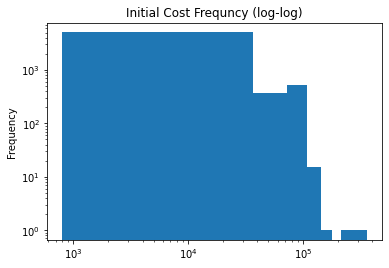

In [79]:
df["Initial Cost"].plot(kind='hist', loglog=True, title='Initial Cost Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

<AxesSubplot:title={'center':'Initial Cost Frequncy, values < 10^8 (log)'}, ylabel='Frequency'>

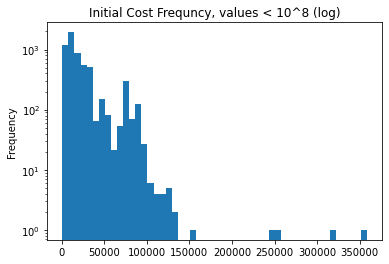

In [80]:
df.loc[df["Initial Cost"]<10**8]["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy, values < 10^8 (log)')

Plotting total estimated fee shows it is also roughly exponential in distribution

<AxesSubplot:title={'center':'Total Estimated Fee Frequncy (log-log)'}, ylabel='Frequency'>

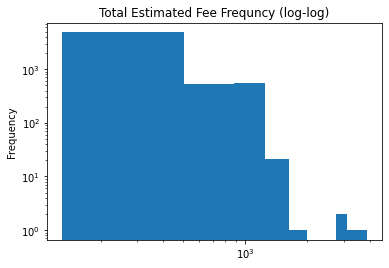

In [81]:
df["Total Estimated Fee"].plot(kind='hist', loglog=True, title='Total Estimated Fee Frequncy (log-log)')

<AxesSubplot:title={'center':'Total Estimated Fee Frequncy, values < 10^7 (log)'}, ylabel='Frequency'>

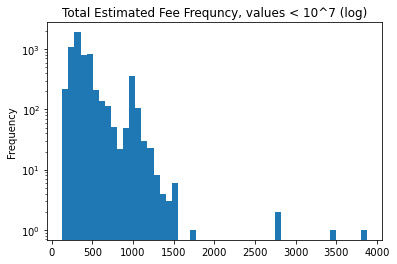

In [82]:
df.loc[df["Total Estimated Fee"]<10**7]["Total Estimated Fee"].plot(kind='hist', logy=True, bins=50, title='Total Estimated Fee Frequncy, values < 10^7 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing Initial costs

In [83]:
df["Initial Cost"].min()

800.0

In [84]:
df["Initial Cost"].max()

358000.0

In [85]:
df.loc[df['Initial Cost'] < 0]['Initial Cost']

Series([], Name: Initial Cost, dtype: float64)

It's likely that these values were mistakenly entered as negative, so we'll flip them to positive instead of setting them to zero

In [86]:
df.loc[df['Initial Cost'] == -33000.0, 'Initial Cost'] = 33000.0
df.loc[df['Initial Cost'] == -100.0, 'Initial Cost'] = 100.0

This is test data:

In [87]:
#the entire line is filled with fake and false information
# The street name is BIS TEST STREET, and almost every value is either the first possible value for the column type, or empty
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


We will drop this row

In [88]:
#df.drop(labels=df.loc[df['Initial Cost'] == 999999999].index[0], axis=0, inplace=True)

In [89]:
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


These seem to be real probably

In [90]:
df.loc[df['Initial Cost']>= 9000000]["Initial Cost"]

Series([], Name: Initial Cost, dtype: float64)

In [91]:
df["Initial Cost"].max()

358000.0

In [92]:
#nothing wrong with this one anymore
df.loc[df['Initial Cost'] == 966331800]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


<AxesSubplot:title={'center':'Initial Cost Frequncy (log)'}, ylabel='Frequency'>

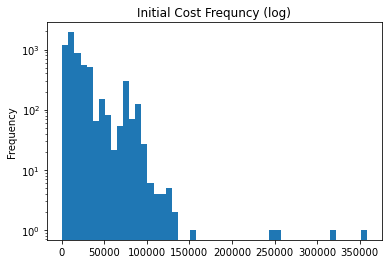

In [93]:
df["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy (log)')

#### Fixing Total Estimated Fee

In [94]:
df.loc[df['Total Estimated Fee'] < 0 ]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


We'll fix this as we did with negative monetary values before

In [95]:
df.loc[df['Total Estimated Fee'] == -85.8,  'Total Estimated Fee'] = 85.8

In [96]:
df['Total Estimated Fee'].max()

3870.9

Also seems to have real information

In [97]:
#df.loc[df['Total Estimated Fee']==31500000.0]

## Checking owner's information

In [98]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Owner Type', 'Owner Type Description', 'Non-Profit',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'Owner's House #', 'Owner's House Street Name', 'City',
       'Owner's House State', 'Zi

In [99]:
show_vals("Owner's Business Name")
#show_vals("Owner's House #")
show_vals("Owner's House Street Name")
#show_vals("Owner's House City")
show_vals("Owner's House State")
#show_vals("Owner's House Zip")

Top 10 Owner's Business Name:

T-MOBILE                            582
T-MOBILE NORTHEAST LLC              570
AT&T MOBILITY                       298
SHORE 2 SHORE, AGENT FOR TENANT     113
BECHTEL, AS AGENT FOR TENANT        110
NaN                                 103
JACOBS, AS AGENT FOR TENANT          71
NEW CINGULAR WIRELESS PCS, LLC       66
VENDOR, AS AGENT FOR TENANT          62
N/A                                  43
Name: Owner's Business Name, dtype: int64

Top 10 Owner's House Street Name:

SYLVAN WAY                          1153
AT&T WAY                             255
AT&T WAY, 3A212F                     152
BROADWAY                             142
MERRICK ROAD                         119
MADISON AVENUE                       115
BROADACRES DRIVE                     111
NaN                                  103
PARK AVENUE                           73
FIFTH AVENUE                          51
Name: Owner's House Street Name, dtype: int64

Top 10 Owner's House State:

NY   

## Fixing owner's informations

In [100]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)new york city")]["Owner's Business Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY     9
NEW YORK CITY INVESTMENT GROUP L    1
NEW YORK CITY HEALTH & HOSPITALS    1
NEW YORK CITY CAPITAL, LLC          1
NEW YORK CITY COLLEGE OF TECHNOL    1
NEW YORK CITY ECONOMIC DEV. CORP    1
Name: Owner's Business Name, dtype: int64

Normalizes a couple of duplicate names

In [101]:
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner's Business Name"] = df["Owner's Business Name"].str.upper()
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(".", '', regex=False)
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [102]:
#may have to use fuzzy/cluster to fix this problem
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner's Business Name"].value_counts()

NYC HOUSING AUTHORITY               36
NYC HOUSING AUTHORITY                9
Name: Owner's Business Name, dtype: int64

Used clusters to try to fix the rest of them further below

In [103]:
df["Owner's House State"].value_counts()

NY    3913
NJ    1916
FL      40
PA      17
CA      16
MA       9
KS       6
CT       6
VA       5
NC       5
UT       4
GA       4
IL       4
MD       4
MO       3
CO       2
OH       1
NH       1
TX       1
WA       1
KY       1
AZ       1
DE       1
Name: Owner's House State, dtype: int64

Since the states can be outside NYC, these are probably fine

In [104]:
#df["Owner's House Zip"].value_counts()

## Looking at Phone Numbers:

In [105]:
show_vals("Owner's Phone #")

Top 10 Owner's Phone #:

9733974814    966
9144389326    323
9738971375    234
2017573053    193
9738988589    138
2015710700    135
9733974800    132
5165572398    120
NaN           103
2016484016     76
Name: Owner's Phone #, dtype: int64



A lot of the same phone numbers

In [106]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')

In [107]:
df.loc[df["Owner's Phone #"].str.contains("7184728000")][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #


All from the same business name so it makes sense

In [108]:
df.loc[df["Owner's Phone #"]=='nan']

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date
45,0,EGRESS,OR OCCUPANCY.|01/24/2018 00:00:00,,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
56,0,AS AGENT FOR TENANT |ONE |AT&T WA...,EGRESS,OR OCCUPANCY.|06/13/2017 00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
64,0,3A212F |BEDMINSTER |NJ|079...,EGRESS,OR OCCUPANCY.|02/02/2017 00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
79,0,RELATED DUNNAGE AND RELATED ANTENNAS ON ROOF ...,EGRESS,OR OCCUPANCY.|01/25/2018 00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
98,0,EGRESS,OR OCCUPANCY.|02/11/2017 00:00:00,,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,0,USE,OR EGRESS.|06/18/2016 00:00:00,,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
5379,0,USE,OR EGRESS.|07/06/2016 00:00:00,,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
5665,440229664,01,4,84-11,ELMHURST AVENUE,01518,00083,4037523,A3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,05/27/2021 12:00:00 AM,INSTALLATION OF ANTENNAS AND RRU'S WITH RELATE...,05/28/2021 00:00:00
5815,0,RELATED DUNNAGE AND RELATED ANTENNAS ON ROOF ...,EGRESS OR OCCUPANCY.|11/19/2016 00:00:00,,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN


Nothing wrong with these jobs without an owner's phone number

In [109]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains("-")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

Phone numbers should not contain "-"

In [110]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

Phone numbers should not contain empty space

### Cleaning phone number

#### removes non-numeric characters

In [111]:

df["Owner's Phone #"] = df["Owner's Phone #"].str.extract('(\d+)', expand=False)
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

#### Turns phone numbers that start with 0, 1, and does not have 10 digits into nan

In [112]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[~df["Owner's Phone #"].isna() & ((df["Owner's Phone #"].str[0] == "0") | (df["Owner's Phone #"].str[0] == "1") | (df["Owner's Phone #"].apply(len) != 10)), ["Owner's Phone #"]] = np.nan

#### Checks to see if there are any others not of length 10

In [113]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[(df["Owner's Phone #"].apply(len) != 10)]["Owner's Phone #"]

45      nan
56      nan
64      nan
79      nan
98      nan
       ... 
5326    nan
5379    nan
5665    nan
5815    nan
5889    nan
Name: Owner's Phone #, Length: 102, dtype: object

#### Check for non-numeric charaters

In [114]:
df.loc[(~df["Owner's Phone #"].str.isnumeric()) & (~(df["Owner's Phone #"]=='nan'))]["Owner's Phone #"]

Series([], Name: Owner's Phone #, dtype: object)

### Checking additional numerical columns for coherency

In [115]:
# numerical_columns = ['Proposed Zoning Sqft',
#        'Enlargement SQ Footage', 'Street Frontage', 'Existing # of Stories',
#        'Proposed # of Stories', 'Existing Height', 'Proposed Height',
#        'Existing Dwelling Units', 'Proposed Dwelling Units']

Try to convert these all to numeric values

In [116]:
# for col in numerical_columns:
#     df[col] = df[col].astype('str')

In [117]:
# for col in numerical_columns:
#     print(col)
#     print(df.loc[(~df[col].str.isdigit())
#       &(df[col]!='nan')][col])
#     print()

### Fix these issues so we can covnert to numerical values:

We're going to assume like before that these values are unintentially entered as negative when they should be postive

In [118]:
# df['Enlargement SQ Footage'] = df['Enlargement SQ Footage'].str.replace('-', '', regex=False)
# df['Proposed Height'] = df['Proposed Height'].str.replace('-', '', regex=False)

In [119]:
# df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)
# df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)

In [120]:
# df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('.', '', regex=False)
# df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('-', '', regex=False)
# df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NONE', '0', regex=False)
# df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NON5', '0', regex=False)

##### Try to convert to numerical values now:

In [121]:
# for col in numerical_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [122]:
# for col in numerical_columns:
#     show_vals(col)

Lets replace NaN values with 0 here and convert to ints

In [123]:
# df['Existing Dwelling Units'].fillna(0, inplace=True)
# df['Proposed Dwelling Units'].fillna(0, inplace=True)

In [124]:
# df['Existing Dwelling Units'] = pd.to_numeric(df['Existing Dwelling Units'], errors='coerce', downcast='integer')
# df['Proposed Dwelling Units'] = pd.to_numeric(df['Proposed Dwelling Units'], errors='coerce', downcast='integer')

In [125]:
# for col in numerical_columns:
#     print(col)
#     print("Minimum: ", df[col].min())
#     print("Maximum: ", df[col].max())
#     print()

##### Incorrect numerical values here. The tallest building in NYC in One World Trade Center, with 104 stories, and 1,776 ft. 
 All of these cannot be true:

In [126]:
# df.loc[df['Existing # of Stories'] >= 105]

In [127]:
# df.loc[df['Proposed # of Stories'] >= 105]['Proposed # of Stories']

In [128]:
# df.loc[df['Existing Height'] > 1776]

In [129]:
# df.loc[df['Proposed Height'] > 1776]

The largest number of units in one building in NYC is < 1400

In [130]:
# df.loc[df['Existing Dwelling Units'] >= 1400]['Job Description'][:35]

#### map these clearly false numerical values to 0

In [131]:
# df.loc[df['Existing # of Stories'] >= 105, 'Existing # of Stories'] = 0
# df.loc[df['Proposed # of Stories'] >= 105, 'Proposed # of Stories'] = 0
# df.loc[df['Existing Height'] >= 1776, 'Existing Height'] = 0
# df.loc[df['Proposed Height'] >= 1776, 'Proposed Height'] = 0
# df.loc[df['Existing Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0
# df.loc[df['Proposed Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0

## Districts

### Looking at Zoning districts

In [132]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Owner Type', 'Owner Type Description', 'Non-Profit',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'Owner's House #', 'Owner's House Street Name', 'City',
       'Owner's House State', 'Zi

In [133]:
#Residence (R), Commerical (C), Manufacturing (M)
df['Zoning District 1']
#show_vals("Zoning District 1")
#show_vals("Zoning District 2")

0       C5-4        
1       M1-6        
2       M2-3        
3       R8          
4       R6B         
            ...     
6085    R4          
6086    R6          
6087    M1-5/R9     
6088    R10A        
6089    R7A         
Name: Zoning District 1, Length: 6063, dtype: object

Some districts may contain invalid formats

In [134]:
#.4-4 looks weird
df["Zoning District 1"].value_counts(dropna=False)

R6              590
R5              485
R7-2            334
R4              288
R7-1            273
               ... 
M1-4D             1
C4-6              1
C4-4L             1
C2-9A             1
M1-1/R7-2         1
Name: Zoning District 1, Length: 136, dtype: int64

In [135]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 1"] = df["Zoning District 1"].astype('str')
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 1"].value_counts()

HAZMAT200       1
Name: Zoning District 1, dtype: int64

In [136]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 2"] = df["Zoning District 2"].astype('str')
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 2"].value_counts()

71219           1
Name: Zoning District 2, dtype: int64

In [137]:
#turning the values above into np.nan
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 1"]] = np.nan
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 2"]] = np.nan

### Looking at special districts

In [138]:
#show_vals("Special District 1")
#show_vals("Special District 2")

In [139]:
#Checks to see if there are lower case values
df.loc[~df["Special District 1"].isna() & df["Special District 1"].str.islower()]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Business Name,Owner's House #,Owner's House Street Name,City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,Job Description,DOB Run Date


### Analysis

Zoning districts had some zones that were invalid such as number only values (ex.31010)  and we changed those values to nan

The typical format for Zoning districts start with C, R, and N. There are also some special districts like PARK and BPC that we also checked

Special Districts didn't have any noticable values that were out of place

In [140]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

In [141]:
date_cols = []

print("Datetime Data columns:\n")
for col in ds.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.02)

Datetime Data columns:

Latest Action Date
Pre- Filing Date
First Permit  Date
DOBRunDate
----------------------------

Column:  Latest Action Date
1.                   100
2.  06/08/2015 00:00:00          36
3.  07/06/2015 00:00:00          31
4.  06/05/2015 00:00:00          30
5.  06/04/2015 00:00:00          26
6.  08/25/2015 00:00:00          26
7.  08/03/2015 00:00:00          24
8.  12/18/2015 00:00:00          24
9.  07/21/2015 00:00:00          23
10. 06/24/2015 00:00:00          21

Total number of distinct values in Latest Action Date is 1146
['', ' OCCUPANCY']
['', '08/27/2015 00:00:00', '05/21/2015 00:00:00', '08/19/2015 00:00:00', '08/03/2015 00:00:00', '06/08/2015 00:00:00', '07/21/2015 00:00:00', '08/31/2015 00:00:00', '10/06/2016 00:00:00', '07/06/2015 00:00:00', '11/05/2015 00:00:00', '06/24/2015 00:00:00', '12/10/2015 00:00:00', '06/23/2015 00:00:00', '06/04/2015 00:00:00', '06/05/2015 00:00:00', ' OCCUPANCY', '12/18/2015 00:00:00', '08/25/2015 00:00:00', '06/01/2016

Number Remember that after changing some of the column names, there are some columns that are also datetime data:

"Paid": "Paid Date"\
"Fully Paid": "Fully Paid Date"\
"Assigned": "Assigned Date"\
"Approved": "Approved Date"\
"Pre- Filing Date": "Pre-Filing Date"\
"DOB Run Date": "DOB Run Date"\
"SIGNOFF_DATE": "Signoff Date"\
"SPECIAL_ACTION_DATE": "Special Action Date"\

In [142]:
##date_cols = ["Filing Date","Issuance Date","Expiration Date","Job Start Date", "DOB Run Date"]

for col in date_cols:
    findDateOutliers(col, 0.02)

Column:  Latest Action Date
1.                   100
2.  06/08/2015 00:00:00          36
3.  07/06/2015 00:00:00          31
4.  06/05/2015 00:00:00          30
5.  06/04/2015 00:00:00          26
6.  08/25/2015 00:00:00          26
7.  08/03/2015 00:00:00          24
8.  12/18/2015 00:00:00          24
9.  07/21/2015 00:00:00          23
10. 06/24/2015 00:00:00          21

Total number of distinct values in Latest Action Date is 1146
['', ' OCCUPANCY']
['', '08/27/2015 00:00:00', '05/21/2015 00:00:00', '08/19/2015 00:00:00', '08/03/2015 00:00:00', '06/08/2015 00:00:00', '07/21/2015 00:00:00', '08/31/2015 00:00:00', '10/06/2016 00:00:00', '07/06/2015 00:00:00', '11/05/2015 00:00:00', '06/24/2015 00:00:00', '12/10/2015 00:00:00', '06/23/2015 00:00:00', '06/04/2015 00:00:00', '06/05/2015 00:00:00', ' OCCUPANCY', '12/18/2015 00:00:00', '08/25/2015 00:00:00', '06/01/2016 00:00:00', '04/25/2016 00:00:00']

Column:  Pre- Filing Date
1.                   101
2.  05/22/2015 12:00:00 AM       

# Analysis

the above results show the problems for the data cleaning task:
    
### Latest Action Date
outliers: '06//1403'
format: 'yyyy-mm-dd' and 'mm/dd/yyyy'

### Pre- Filing Date
no problem found

### DOB Run Date
format: 'yyyy-mm-dd' and 'mm/dd/yyyy 00:00:00'

### SIGNOFF_DATE
outliers: empty value

### SPECIAL_ACTION_DATE
outliers: empty value and '11//2006'

### Paid
outliers: empty value

### Fully Paid
outliers: empty value

### Assigned
outliers: empty value

### Approved
outliers: empty value

Number Data Cleaning for outliers in datetime columns

## Fixing Datetime columns format

In [145]:
# datetime_column_list = []
# for col in ds.columns:
#     if 'Date' in col or 'DATE' in col:
#         print(col)
#         datetime_column_list.append(col)

#for col in date_cols:
    #show_vals(rename_dict[col])

#Check to see if any columns have values in year-month-day format

In [151]:
# for col in date_cols:
#     print(col, '\n', df.loc[df[col].str.contains('-', regex=False, na=False)][col], '\n\n')

In [152]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Owner Type', 'Owner Type Description', 'Non-Profit',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'Owner's House #', 'Owner's House Street Name', 'City',
       'Owner's House State', 'Zi

#### Fix the remaining Datetime columns

In [155]:
for col in date_cols:
    print(col)
    try:
        df.loc[:,rename_dict[col]] = pd.to_datetime(df[rename_dict[col]])
    except Exception as e:
        continue

Latest Action Date
Pre- Filing Date
First Permit  Date
DOBRunDate


These should all be proper datetime64[ns] columns now:

In [156]:
df.select_dtypes(include='datetime')

,Pre-Filing Date,DOB Run Date
0,2016-07-11,2016-08-17
1,2016-03-14,2016-08-17
2,2015-03-04,2016-08-17
3,2016-06-07,2016-08-17
4,2016-04-15,2016-08-18
...,...,...
6085,2020-09-30,2020-11-24
6086,2020-10-30,2021-01-09
6087,2020-12-02,2021-01-20
6088,2017-03-07,2021-02-20


In [157]:
#for col in datetime_column_list:
#    show_vals(col)

### Check the coherence of datetime values

~These don't make sense, but it's not entirely clear if they should be swapped, or removed or what~

All these are okay!


In [158]:
# df.loc[(df['Field Inspection Completed Date'] > df['Filing Date'])
#       &(~df['Field Inspection Completed Date'].isna() & ~df['Filing Date'].isna())][['Field Inspection Completed Date', 'Filing Date']]

In [159]:
# df.loc[(df['Expiration Date'] < df['Issuance Date'])
#       &(~df['Expiration Date'].isna() & ~df['Issuance Date'].isna())][['Expiration Date', 'Issuance Date']]

Good, no expirations before issuance

Here it's not clear how a job could start after the issuance expires, but this may have actually happened

In [160]:
# df.loc[(df['Job Start Date'] > df['Expiration Date'])
#       &(~df['Job Start Date'].isna() & ~df['Expiration Date'].isna())][['Job Start Date', 'Expiration Date']]

##### These are, however a small percentage of of our total jobs

Fraction of jobs Assigned after they were already approved out of total jobs

In [161]:
#df.loc[df['Job Start Date'] > df['Expiration Date']]['Job Start Date'].count()/df['Job Start Date'].count()

Number Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [162]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [163]:
#date_cols = ["Comments"]

In [164]:
#date_cols = ["COMMENTS"]
print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  Latest Action Date
1.                   100
2.  06/08/2015 00:00:00          36
3.  07/06/2015 00:00:00          31
4.  06/05/2015 00:00:00          30
5.  06/04/2015 00:00:00          26
6.  08/25/2015 00:00:00          26
7.  08/03/2015 00:00:00          24
8.  12/18/2015 00:00:00          24
9.  07/21/2015 00:00:00          23
10. 06/24/2015 00:00:00          21

Total number of distinct values in Latest Action Date is 1146
['', ' OCCUPANCY']

Column:  Pre- Filing Date
1.                   101
2.  05/22/2015 12:00:00 AM          72
3.  04/21/2015 12:00:00 AM          61
4.  05/07/2015 12:00:00 AM          47
5.  08/06/2015 12:00:00 AM          46
6.  05/19/2015 12:00:00 AM          46
7.  05/02/2015 12:00:00 AM          42
8.  05/06/2015 12:00:00 AM          41
9.  05/05/2015 12:00:00 AM          39
10. 07/08/2015 12:00:00 AM          39

Total number of distinct values in Pre- Filing Date is 1066
['', '05/22/2015 12:00:00 AM', '04/21/2015 12:0

Number Analysis

the above results show the problems for the data cleaning task:
    
### For City

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.


### For Other Description

Other Description can be anything, so we just care about empty value and values that are too similar and are showing exactly same things (for example 'GC' and '___GC')

In [165]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [167]:
upper = ds\
    .select("City")\
    .update("City", str.upper)

In [168]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [169]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


Number An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [170]:
brooklyn = ds\
    .select("City")\
    .update("City", str.upper)\
    .filter(And(Eval("City", Soundex()) == soundex('BROOKLYN'), Col("City") != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME
1.	739	BROOKLYN       
2.	3	BROOKYLN       
3.	1	BROOKLYN,      
4.	1	BROOKLY        
5.	1	BROKKLYN       


Number Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

Number Transform all city names to upper case

### Remember that we have changed some column names:
"City ": "Owner's House City"\
"State": "Owner's House State"

In [173]:
df["Owner's House City"] = df["Owner's House City"].str.upper()

In [174]:
# Convert similar values to suggested value using kNN clustering

In [177]:
# # Cluster string using kNN clusterer (with the default n-gram setting)
# # using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2, preds = 0.5):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(preds)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i <5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
    
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [180]:
date_cols = ["City"]#,'Other Description' ]


# print("kNN cluster for ", "Qewi City")
# col_clusters = getClusters("Qewi City ")
# print("updating column ", "Qewi City")
# print("----------------------\nTop 5 Cluster:\n----------------------")
# updateUsingClusters("Qewi City", col_clusters, True)
print("================")

print("kNN cluster for ", date_cols[0])
col_clusters = getClusters(date_cols[0])
print("updating column ", date_cols[0])
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters("Owner's House City", col_clusters, True)
print("================")

kNN cluster for  City
updating column  City
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 109)

EMERSON         (1)
QUEEN           (4)
MALVERN         (3)
PARLIN          (1)
FENTON          (2)
YORKTOWN        (2)
ALBERTSON       (2)
EDISON          (3)
MT VERNON       (1)
ROSALYN         (1)
.......99 more items

Suggested value: NEW YORK       


Cluster 1 (of size 105)

QUEEN           (4)
MALVERN         (3)
PARLIN          (1)
FENTON          (2)
YORKTOWN        (2)
ALBERTSON       (2)
EDISON          (3)
MT VERNON       (1)
ROSALYN         (1)
WOBURN          (6)
.......95 more items

Suggested value: NEW YORK       


Cluster 2 (of size 105)

EMERSON         (1)
LEVITTOWN       (2)
QUEEN           (4)
MALVERN         (3)
PARLIN          (1)
FENTON          (2)
YORKTOWN        (2)
ALBERTSON       (2)
EDISON          (3)
ROSALYN         (1)
.......95 more items

Suggested value: NEW YORK       


Cluster 3 (of size 104)

EMERSON         (1)
QUEE

In [ ]:
# After clustering, find data that is not in the reference city dataset, hard code to clean them

In [182]:
upper_city_list = []
for item in city_list:
    upper_city_list.append(str(item.upper()))

outlier_cities = df.loc[(~df["Owner's House City"].str.upper().isin(upper_city_list)) & (~df["Owner's House City"].isna())]["Owner's House City"].drop_duplicates()
print(outlier_cities)

0       BROOKLYN       
1       NEWARK         
2       NEW YORK       
7       MIDDLE VILLAGE 
8       BRIARWOOD      
             ...       
5785    ROSLYN         
5818    LONG BEACH     
5842    SUFFERN        
5901    TENAFLY        
6010    BROKKLYN       
Name: Owner's House City, Length: 281, dtype: object


In [183]:
# Print standardized cities and found outliers

In [184]:
standardized_cities = df.loc[(df["Owner's House City"].str.upper().isin(upper_city_list)) & (~df["Owner's House City"].isna())]["Owner's House City"].drop_duplicates()
print(standardized_cities)

Series([], Name: Owner's House City, dtype: object)


In [185]:
outlier_city_list = []
for item in outlier_cities:
    outlier_city_list.append(str(item))
    
print(outlier_city_list)

['BROOKLYN       ', 'NEWARK         ', 'NEW YORK       ', 'MIDDLE VILLAGE ', 'BRIARWOOD      ', 'MASSAPEQUA     ', 'BEDMINSTER     ', 'PARSIPPANY     ', 'OVERLAND PARK  ', 'LIDO BEACH     ', 'MORRISTOWN     ', 'FLUSHING       ', 'MASPETH        ', 'NEW HYDE PARK  ', 'BRONX          ', 'BLOOMFIELD     ', 'GREAT NECK     ', 'STATEN ISLAND  ', 'ROCKAWAY BEACH ', 'LOS ANGELES    ', 'NEW YORK,      ', 'MANHASSET      ', 'SALT LAKE CITY ', 'BOCA RATON     ', 'RIDGEWOOD      ', 'FLORAL PARK    ', 'COLTS NECK     ', 'QUEENS         ', 'FOREST HILLS   ', 'COLLEGE POINT  ', 'BROOKYLN       ', 'WHITESTONE     ', 'BAYSIDE        ', 'EMERSON        ', 'DOUGLASTON     ', 'ASTORIA        ', 'SCARDALE       ', 'LONG ISLAND CIT', 'RUTHERFORD     ', 'EAST MORICHES  ', 'GLEN OAKS      ', 'LEVITTOWN      ', 'ELMHURST       ', 'ENGLEWOOD CLIFF', 'MERRICK        ', 'CANONSBURG     ', 'TEMPLE TERRACE ', 'PARAMUS        ', 'QUEEN          ', 'SCARSDALE      ', 'SYOSSET        ', 'TINTON FALLS   ', 'LIC       

In [186]:
# Search for similar city names in reference city dataset, and hard code to replace those outliers

In [187]:
def findCityName(str):
    print(city_df['city'].loc[city_df['city'].str.contains(str)].drop_duplicates())
    print("------------------------\n")
    
findCityName("Rich")
findCityName("Island")
findCityName("White")
findCityName("Philadelphia")
findCityName("Morris")
findCityName("Nassau")
findCityName("Westchester")
  

137       Richmond
1728    Richardson
1860      Richland
Name: city, dtype: object
------------------------

498       Rock Island
1060     Grand Island
1286    Staten Island
1294     Coney Island
Name: city, dtype: object
------------------------

363             White Springs
1266             White Plains
1881    White Sulphur Springs
Name: city, dtype: object
------------------------

997         Philadelphia
1418    New Philadelphia
Name: city, dtype: object
------------------------

1151    Morristown
Name: city, dtype: object
------------------------

Series([], Name: city, dtype: object)
------------------------

Series([], Name: city, dtype: object)
------------------------



In [188]:
outlier_city_list = ['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]
clean_city_list = ['NEW YORK CITY', 'BROOKLYN', 'BROOKLYN', 'RICHMOND', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'MANHATTAN', 'NEW YORK CITY', 'BROOKLYN', 'BETHESDA', 'NEW YORK CITY', 'SECAUCUS', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'PARAMUS', 'NEW YORK CITY', 'WOONSOCKET', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'STATEN ISLAND', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'WHITE PLAINS', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'BROOKLYN', 'PHILADELPHIA', 'QUEEENS', 'NEW YORK CITY', 'NEW YORK CITY', 'GILLFORD', 'MORRIS', 'NEW YORK CITY', 'LONG ISLAND CITY', 'QUEENS', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'QUEENS', 'NEW YORK CITY', 'NASSAU', 'QUEENS', 'QUEENS', 'WOODHAVEN', 'NEW YORK CITY', 'NASSAU', 'SAN JUAN CAPISTRANO', 'BROOKLYN', 'RIVERDALE', 'STATEN ISLAND', 'NASSAU', 'LONG ISLAND CITY', 'QUEENS', "BROOKLYN"]

df["Owner's House City"] = df["Owner's House City"].replace(outlier_city_list, clean_city_list)

In [189]:
# Check State Column

In [192]:
state_col = 'State'
findDateOutliers(state_col, 0.1)

Column:  State
1.        NY       3,930
2.        NJ       1,925
3.                   103
4.        FL          40
5.        PA          17
6.        CA          16
7.        MA           9
8.        KS           6
9.        CT           6
10.       VA           5

Total number of distinct values in State is 24
['', 'NJ', 'NY']



In [193]:
ds.select('State').distinct()

Counter({'NY': 3930,
         'NJ': 1925,
         'KS': 6,
         '': 103,
         'CA': 16,
         'UT': 4,
         'FL': 40,
         'PA': 17,
         'GA': 4,
         'CT': 6,
         'IL': 4,
         'MD': 4,
         'MO': 3,
         'VA': 5,
         'NC': 5,
         'CO': 2,
         'MA': 9,
         'OH': 1,
         'NH': 1,
         'TX': 1,
         'WA': 1,
         'KY': 1,
         'AZ': 1,
         'DE': 1})

In [194]:
# Find functional dependencies violations on City -> State

In [197]:
from openclean.operator.collector.count import distinct
from openclean.operator.map.violations import fd_violations

groups = fd_violations(df, lhs="Owner's House City", rhs="Owner's House State")

print('City         \t|            State')
print('=============\t|  ===============')
for key in groups:
    conflicts = distinct(groups.get(key), "Owner's House State").most_common()
    state, count = conflicts[0]
    print('{:<12} \t| {} x {}'.format(key, count, state))
    for state, count in conflicts[1:]:
        print('             \t| {} x {}'.format(count, state))
    print('-------------\t|  ---------------')

City         	|            State
=============	|  ===============
BEDMINSTER      	| 407 x NJ
             	| 1 x NY
-------------	|  ---------------
PARSIPPANY      	| 1189 x NJ
             	| 1 x NY
-------------	|  ---------------
BOCA RATON      	| 29 x FL
             	| 4 x NY
-------------	|  ---------------
NEW YORK CITY 	| 13 x NY
             	| 6 x NJ
-------------	|  ---------------
CHICAGO         	| 1 x NY
             	| 1 x IL
-------------	|  ---------------
GLENDALE        	| 7 x NY
             	| 6 x CA
-------------	|  ---------------
GREENWICH       	| 4 x CT
             	| 1 x NY
-------------	|  ---------------
ORLANDO         	| 1 x NY
             	| 1 x FL
-------------	|  ---------------
FORT LEE        	| 7 x NJ
             	| 1 x NY
-------------	|  ---------------
CHARLOTTE       	| 3 x NC
             	| 1 x NY
-------------	|  ---------------
PARSIPPANY,     	| 17 x NJ
             	| 1 x NY
-------------	|  ---------------
JACKSON         	| 2 x NJ


In [198]:
#There is a row that has "NEW YORK CITY" as city, but have "NJ" as State, fix its state to "NY"

In [199]:
index = df["Owner's House State"].loc[(df["Owner's House City"] == "NEW YORK CITY") & (df["Owner's House State"] == "NJ")].index[0]
df["Owner's House State"].update(pd.Series(['NY'], index = [index]))

In [200]:
df["Owner's House State"].loc[(df["Owner's House City"] == "NEW YORK CITY") & (df["Owner's House State"] == "NJ")]

1811    NJ
2905    NJ
3593    NJ
4103    NJ
4992    NJ
Name: Owner's House State, dtype: object

In [201]:
# Apply similar operation on Owner Bus Name

In [202]:
#bn_col = "Qewi Bus Name"
#findDateOutliers(bn_col)

In [203]:
# Using clustering for Business Name takes too much time, we can only clean those empty data for now 

In [204]:
#df[bn_col] = df[bn_col].replace(['N/A', '', 'NA','NONE'], [None,None,None,None])

### Data Profilling for applicant columns

#Find format problems and outliers in all applicant columns

#Using openclean's sklearn modules to detect problems and outliers

In [216]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [217]:
date_cols = []

print("Qewi Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

Qewi Data columns:

Applicant's First Name
Applicant's Last Name
Applicant Professional Title
Applicant License #


In [218]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

Applicant Data columns:

Applicant's First Name
Applicant's Last Name
Applicant Professional Title
Applicant License #
----------------------------

Column:  Applicant's First Name
1.  STEPHEN                 839
2.  JOHN                    646
3.  ANTONIO                 535
4.  PETER                   495
5.  JAMES                   493
6.  NICHOLAS                463
7.  CHAD                    452
8.  MICHAEL                 341
9.  ROBERT                  280
10. GLENN                   191

Total number of distinct values in Applicant's First Name is 61
['', 'MICHAELS       ', 'CHRISTOPHER    ', 'PETER          ', 'MANOJKUMAR     ', 'ILIYASSOU      ', 'LLIYASSOU      ', 'MICHAEL        ', 'JAMES          ', 'JOHN           ', 'STEPHEN        ', 'ROBERT         ', 'GLENN          ', 'GREGORY        ', 'PHILLIP        ', 'SCOTT          ', 'NICHOLAS       ', 'CHAD           ', 'ANTONIO        ']

Column:  Applicant's Last Name
1.  BRAY                                   841
2.  ADEL

#Analysis

#the above results show the problems for the data cleaning task:
    
## For name data

#in "Applicant's First Name", "Applicant's Last Name", "Applicant Professional Title", there are many outliers which are illegal input, and there are many similar values. We need first converts evident outliers to legal values, then use kNN clusterer to standardize similar values.


## Applicant License Number

#Applicant License Number is made of 6 digits, there are outliers that do not satisfy the 6-digit format. We can not use kNN clusterer to standardize because many License Number are similar. 

In [219]:
# Data Cleaning for Applicant columns

#* how to deal with empty values has not decided yet

In [221]:
# mapping list to replace outliers
outlier1 = ['', 'MR. ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM 11', 'JOSEP;H``', 'DAID/11/2007', 'CHUNG   LUN', '718 9215010', 'ANTHONY', 'HSIA0-NAN', 'JOSEPH', '``````````', 'ROBERT  `', 'RAJENDRA9956700', '2', 'G.B.M.', 'EUGENE......JR', '6312100', 'CLAUDE,JR.', 'THOMAS``', 'ALAN  L', 'Nab53', 'MR. Y. B', 'J.J', 'PH8ILIP', 'I. M', 'RICHARD', 'ALBERTA S 111 D', 'P ;', 'GENECG.C. ENG &', 'J.J.', '2126202794', 'SHAW  HWA', 'HARRY         H', 'MR DOU8GLAS', '`1D', 'PAUL', 'K. T.', 'JOHN', '...NORMAN', 'EVAN   D', '7184361278BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MAD/Y/ARNI', 'ES ON SCH B', 'EUGENE.......JR', 'NEAL', 'F._ERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0-TECH', 'RODNEY   __', 'DAVID', 'G. L.', 'JAMES', 'LESLI8E', '7186054055', 'GEORGE', 'G.B.M', 'DAVID    JON', 'CHUNG---YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', '1P', 'JUDE.....N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD/HON-AN', 'GLEN  A.L.', 'J.B. Jr.', 'LORENZO..A', 'J J', '..RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY 2', '...JOSEPH', 'RUSSELL 111', 'THOMAS', 'H./E./CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', '--young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']
mapping1 = [None, 'ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM', 'JOSEPH', None, 'CHUNG LUN', None, 'ANTHONY', 'HSIA0 NAN', 'JOSEPH', None, 'ROBERT', 'RAJENDRA', None, 'G.B.M.', 'EUGENEJR', None, 'CLAUDE JR.', 'THOMAS', 'ALAN  L', 'Nab', 'MR. Y. B', 'J.J', 'PHILIP', 'I. M', 'RICHARD', 'ALBERTA', None, 'GENECG.C. ENG', 'J.J.', None, 'SHAW HWA', 'HARRYH', 'MR DOUGLAS', None, 'PAUL', 'K. T.', 'JOHN', 'NORMAN', 'EVAND', 'BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MADYARNI', 'ES ON SCH B', 'EUGENEJR', 'NEAL', 'FERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0 TECH', 'RODNEY', 'DAVID', 'G. L.', 'JAMES', 'LESLIE', None, 'GEORGE', 'G.B.M', 'DAVID JON', 'CHUNG YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', None, 'JUDE N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD HON-AN', 'GLEN A.L.', 'J.B. Jr.', 'LORENZOA', 'J J', 'RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY', 'JOSEPH', 'RUSSELL', 'THOMAS', 'H.E.CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', 'young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']

outlier2 = ['SHARMA Number0', "0'CONNOR", 'RUSHTON    UEL', 'UDDIN   Z', 'HINKLEY 1', 'O&Number039;CONNOR, P.E.', '.OOK', 'SAMUELS111', 'O&Number039;CONNOR', 'CALIENDO', 'SMITH   JR.', 'LO  BUE', '7AN', '+-+ETTIERI', 'SMITH, 111', 'KAMEN   1', '.EE', 'MASS, 1', '.EI', 'Zagaroli 3rd', 'RINI   II', 'KAMEN   R', 'RYAN 11', 'SPI8EZIA L S', 'MUFTIC..A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL, P.E.', 'HAMA07', 'HINLEY,1', '1212', "O  ' CONNELL", 'HURT,JR.,', 'WESOLOWSKI', 'CHEN', '`ING, R.A', 'MARTARELLA 111', 'Gandhi, Ph.D., P.E.', '90I', 'ENNIS 2', 'COSTELLO R A A I A', '3UI', 'N/A', 'HURT,  JR', 'LEHR,1', 'KOHLER, 111', 'GERAZOUNIS', 'Alexander,1', 'LUBOW, R.A. LEED AP', 'RINI,111', '08CZAK', '````````````````````', 'CHAO  R.A.', 'Geier 11', '08NGEL', '08SOLOWSKI', 'I11', 'HINKLEY, 1', 'RUDIKOFF, P.E.', "O'CONNOR", 'SHAH   EZ', 'MIELE, JR., P.E.', 'RITTENHOUSE 111', 'AMADI   ISIOFIA', 'HINKLEY,1', 'RENFORE````````', "O'HARA,JR.", '73020012', 'PHAGOO   I', 'BRAY.....,', 'LLL', 'BHATHIA,1', 'GANDHI, PH. D., P.E', 'KO K', 'VASSALOTTI 11', 'HURT, JR .', '0018LKLE', 'RINI -111', 'PARIHAR', 'EE', 'L00802', 'ELISE.111', 'KING , R.A', 'CHRYSLER  P E', 'LEHR 1', 'Walters   Jr.', 'LEE', 'RINI  III', 'D&Number039;ANGELO', '0UDOLPH III', 'VIEHE-NAESS 111', ',MO', '08E', '47DIKOFF', 'Yu,', '420865380', 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', '901BEN', '4153LOO', 'SYED-NAQVI', 'RYAN , JR.', 'K O K O R I S', 'ELISEO111', 'O&Number039;CONNELL', 'ZEID61', '---Lewis', '00CHELI', 'MOHAMMAD       +++++', 'METZLER  P E', 'BAILEY', 'GANDHI, PH. D., P.E.', 'TIEMANN.111', 'SMITH.111', 'DI GER0NIMO', 'GANDHI, PH,D., P.E', 'III', 'J C', 'MAGAMI-QAIM-MAGAMI', '+M', 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', 'Y10007OR', 'SMITH,111', 'KING R A FAIA', 'RYAN III, AIA', '08AN', 'STARK 1', 'MASS', 'VICTORI0, R.A', 'RIZVI   A', '21029677', "3'CONNOR", 'Wong /  Lai', 'KAPLAN 3', 'GRAICHEN.JR./DAWN/DI', 'GROSSMAN ,PE,F.A.C.I']
mapping2 = ['SHARMA ', "CONNOR", 'RUSHTON UEL', 'UDDIN Z', 'HINKLEY ', 'CONNOR P.E.', None, 'SAMUELS', 'CONNOR', 'CALIENDO', 'SMITH JR.', 'LO BUE', None, 'ETTIERI', 'SMITH', 'KAMEN', '.EE', 'MASS', '.EI', 'Zagaroli', 'RINI', 'KAMEN R', 'RYAN', 'SPIEZIA L S', 'MUFTIC.A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL P.E.', 'HAMA', 'HINLEY', None, "CONNELL", 'HURT JR.', 'WESOLOWSKI', 'CHEN', 'ING R.A', 'MARTARELLA', 'Gandhi', None, 'ENNIS ', 'COSTELLO R A A I A', None, None, 'HUR  JR', 'LEHR', 'KOHLER 111', 'GERAZOUNIS', 'Alexander', 'LUBOW R.A. LEED AP', 'RINI',None, None, 'CHAO R.A.', 'Geier', None, 'SOLOWSKI', None, 'HINKLEY', 'RUDIKOFF, P.E.', "CONNOR", 'SHAH EZ', 'MIELE JR. P.E.', 'RITTENHOUSE', 'AMADI   ISIOFIA', 'HINKLEY', 'RENFORE', "O'HARA,JR.", None, 'PHAGOO I', 'BRAY,', 'LLL', 'BHATHIA', 'GANDHI', 'KO K', 'VASSALOTTI', 'HURT JR.',None, 'RINI', 'PARIHAR', 'EE', None, 'ELISE', 'KING R.A', 'CHRYSLER  P E', 'LEHR', 'Walters Jr.', 'LEE', 'RINI  III', 'ANGELO', '0UDOLPH III', 'VIEHE-NAESS', 'MO', '08E', None, 'Yu,', None, 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', None, None, None, 'RYAN JR.', 'KOKORIS', 'ELISE', 'CONNELL', None, 'Lewis', 'CHELI', 'MOHAMMAD', 'METZLER  P E', 'BAILEY', 'GANDHI', 'TIEMANN', 'SMITH', 'DI GER0NIMO', 'GANDHI', 'III', 'J C', 'MAGAMI QAIM MAGAMI', None, 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', None, 'SMITH', 'KING R A FAIA', 'RYAN III AIA', None, 'STARK', 'MASS', 'VICTORI0 R.A', 'RIZVIA', None, "CONNOR", 'Wong Lai', 'KAPLAN', 'GRAICHEN.JR. DAWN DI', 'GROSSMAN']

outlier3 = ['', '....DEMO', '050069', 'DEM. CONTR.,', 'XXXXX', 'G/C 10114H9', 'CGWC10114H99', '00', 'X S000155', '082-36-1245', 'G.G', 'LESSEE', '......GC', "'", '..OWNER', 'GC 2293', '--', 'XXXXXX', 'LS 31,721', '...GC', 'gen.cont.', 'G.C TKNumber4592', 'PE', 'RLA - 818', '.....OWNER', 'RLA 16077', 'G C', 'X 4129892', 'G. C.', 'R.L.A', 'GC 1028350', 'WC10114H99', 'LEESEE', 'GEN.CONT.', 'SIGN..HANGER', 'DEMO 20451', 'D8615', '.X', 'P.L.L.C', '..DEMO', 'G .C', 'L A', 'G.C NY11101', '32820', '....OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC99792', 'X 1341946', 'TRACKNumber 1390', 'EXPED.R4466', 'PLLC 9599691', 'G.C 1110101', '029649', '(CHECK)', 'DEM. CONTR,', 'EXPEDIT(H66172)', '.........GC', 'CITY OF N Y', 'GC 1170386', 'G. C', 'CO0OWNER', '(CHECKED)', 'C.C', '23392 1159774', 'DEMO {', 'RA', 'T. 31132', '....GC', 'RLA-787', 'TRACK Number1390', 'D C', 'G.CONTR.', 'DEMO  CONT', '1GC', 'CC', 'demo G.C.', 'TRACK. Number1390', 'M.F.S.P.C.', '...DEMO', 'DEMO G C', '13328', 'GEN  CONT', 'GC 1221073', "GC;'", 'DEMO 1341946', '11234', 'G.C.,', '.....GC', 'LIC.133668259 1', '?', '0WNER', 'C10892', 'GEN..CONT']
mapping3 = [None, 'DEMO', None, 'DEM. CONTR', None, 'G/C', 'CGWC', None, 'X S', None, 'G.G', 'LESSEE', 'GC', None, 'OWNER', 'GC', None, None, 'LS ', 'GC', 'gen.cont.', 'G.C TK', 'PE', 'RLA ', 'OWNER', 'RLA ', 'G C', 'X', 'G. C.', 'R.L.A', 'GC', 'WC', 'LEESEE', 'GEN.CONT.', 'SIGN.HANGER', 'DEMO', None,None, 'P.L.L.C', 'DEMO', 'G.C', 'L A', 'G.C ', None, 'OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC', None, 'TRACK', 'EXPED.R', 'PLLC ', 'G.C', None, None, 'DEM. CONTR,', 'EXPEDIT', 'GC', None, 'GC', 'G.C', 'CO0OWNER', None, 'C.C', None, 'DEMO', 'RA', None, 'GC', 'RLA', None, 'D C', 'G.CONTR.', 'DEMO  CONT', 'GC', 'CC', 'demo G.C.', None, 'M.F.S.P.C.', 'DEMO', 'DEMO G C', None, 'GEN  CONT', 'GC ', "GC ", 'DEMO ', None, 'G.C.', 'GC', 'LIC', None, '0WNER',None, 'GEN.CONT']

outlier4 = ['', '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '99998', '000N/A', '65569+', '01827O', 'R9526', 'LP0256', 'N/A', '1964', 'ISLAND', '1609', '000PW1', '00DEMO', '0688.6', '00000', '.20929', 'LP0258', '000TOR', '0D8615', '0SWITA', '818', 'O02200', 'DEMO', '196', '1075', '0000NT', '215', '0', '00000`', "D'ALTO", '0455', '22377', 'DD8615', '050579', '226', 'SWITA', 'DD6815', 'X02689']
mapping4 = [None, '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '099998', '000000', '065569', '01827O', '0R9526', 'LP0256',None, '001964',None, '001609', '000PW1', '00DEMO', '006886', '000000', '020929', 'LP0258', '000TOR', '0D8615', '0SWITA', '000818', 'O02200', None, '000196', '001075', '0000NT', '000215', '000000', '000000', None, '000455', '022377', 'DD8615', '050579', '000226', None, 'DD6815', 'X02689']

outliers = [outlier1, outlier2, outlier3, outlier4]
mappings = [mapping1, mapping2, mapping3, mapping4]



In [222]:
# Remove evident outliers using hard coded mapping

In [223]:
i = 0
for col in date_cols:
    df[col] = df[col].replace(outliers[i], mappings[i])
    i += 1

In [224]:
## Convert similar values to suggested value using kNN clustering

In [225]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(0.75)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i < 5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
            
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [228]:
cluster_cols = ["Owner's Business Name"]

In [229]:
for col in cluster_cols:
    print("kNN cluster for ", col)
    col_clusters = getClusters(col)
    print("updating column ", col)
    print("----------------------\nTop 5 Cluster:\n----------------------")
    updateUsingClusters(col, col_clusters, True)
    print("================")

kNN cluster for  Owner's Business Name
updating column  Owner's Business Name
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 87)

TUDOR REALTY                     (1)
GOOD REALTY LLC                  (1)
YANI REALTY LLC                  (1)
EDMAR REALTY, LLC                (1)
DGL REALTY INC                   (1)
BLUE 8 REALTY LLC                (1)
MBS REALTY, LLC                  (1)
BRAUSE REALTY LLC                (1)
SIVAN REALTY LLC                 (1)
MPM REALTY, LLC                  (1)
.......77 more items

Suggested value: GERLAN REALTY LLC               


Cluster 1 (of size 83)

GOOD REALTY LLC                  (1)
YANI REALTY LLC                  (1)
EDMAR REALTY, LLC                (1)
BLUE 8 REALTY LLC                (1)
MBS REALTY, LLC                  (1)
BRAUSE REALTY LLC                (1)
SIVAN REALTY LLC                 (1)
MPM REALTY, LLC                  (1)
979 REALTY, LLC.                 (1)
SIVAN REALTY, LLC                (1)

In [ ]:
#Number Save cleaned data

In [ ]:
#Number outputpath = 'cleaned_data.csv'
#Number df.to_csv(outputpath,sep=',',index=False,header=True) 

# Some discussion

We have profiled and cleaned most of the columns, we first change some of the column names so that they present right information about the data, then we look at each of these columns to detect outliers and wrong format.

However, there are still some issues, first we keep most of the empty value as NaN, and we don't know if clustering is the best way to clean the name data since it might convert similar names to one same name. And, business names are too long that we can not perform clustering on them so we only fixed empty values. Also, there are some column names in upper case, we do not know if we should convert them to lower case as other columns.

In [230]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Owner Type', 'Owner Type Description', 'Non-Profit',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'Owner's House #', 'Owner's House Street Name', 'Owner's House City',
       'Owner's Hou

## Precision and Recall

In [233]:
cleaned_columns = ['House #', 'Latest Action Date', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Non-Profit', 
       "Owner's First Name", "Owner's Last Name", "Owner's Business Name",
       "Owner's House #", "Owner's House Street Name", "Owner's House City",
       "Owner's House State", 'Zip Code', "Owner's Phone #",
       'First Permit  Date', 'DOB Run Date']

#cleaned_columns.extend(owner_cols)
#cleaned_columns.extend()


In [234]:
#for col in df.columns:
#    if 'Permittee' in col:
#        cleaned_columns.append(col)

In [235]:
df_sample_data = df_sample.rename(columns=rename_dict)


In [236]:
df_sample_data.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community-Board', 'Landmarked',
       'Little e', 'PC Filed', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Occupancy',
       'Proposed Occupancy', 'Zoning District 1', 'Zoning District 2',
       'Zoning District 3', 'Special District 1', 'Special Distr 2 ',
       'Owner Type', 'Owner Type Description', 'Non-Profit',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'Owner's House #', 'Owner's House Street Name', 'Owner's House City',
       'Owner's Hou

In [237]:
df_sample_data = df_sample_data[cleaned_columns]

In [239]:
df_sample_data

,House #,Latest Action Date,Community-Board,Landmarked,Little e,PC Filed,Other,Other Description,Professional Cert,Pre-Filing Date,...,Owner's Last Name,Owner's Business Name,Owner's House #,Owner's House Street Name,Owner's House City,Owner's House State,Zip Code,Owner's Phone #,First Permit Date,DOB Run Date
5847,1801,11/29/2016 00:00:00,314,NaN,NaN,,X,ANTENNA,NaN,06/29/2015 12:00:00 AM,...,CIAGLIA,T-MOBILE,4,SYLVAN WAY,PARSIPPANY,NJ,07054,9733974800,11/29/2016 12:00:00 AM,11/30/2016 00:00:00
1407,1335,04/06/2015 00:00:00,105,NaN,NaN,,X,ANTENNA,NaN,11/07/2014 12:00:00 AM,...,ZIEREN,HILTON HOTEL CORPORATION,1335,SIXTH AVENUE,NEW YORK,NY,10019,2122615762,04/06/2015 12:00:00 AM,04/07/2015 00:00:00
4436,42-41,01/10/2014 00:00:00,411,NaN,NaN,,X,ANTENNA,NaN,12/04/2013 12:00:00 AM,...,RAYMOND,OZANAM HALL OF QUEENS NURSING HO,42-41,201 STREET,BAYSIDE,NY,11361,7189712725,01/10/2014 12:00:00 AM,01/11/2014 00:00:00
1580,5004,05/29/2015 00:00:00,318,NaN,NaN,,X,ANTENNA,NaN,04/13/2015 12:00:00 AM,...,MAYBECK,VERIZON WIRELESS,4,CENTEROCK RD,WEST NYACK,NY,10994,2122465111,05/29/2015 12:00:00 AM,05/30/2015 00:00:00
2734,1243,10/19/2015 00:00:00,503,NaN,NaN,,X,ANTENNA,NaN,09/03/2015 12:00:00 AM,...,"SAVO, JR.","WOODROW PLAZA, LLC # 2",15,SEGUINE AVE,STATEN ISLAND,NY,10309,7183511600,10/19/2015 12:00:00 AM,10/20/2015 00:00:00
4803,62-81,09/04/2014 00:00:00,405,NaN,NaN,,X,ANTENNA,NaN,07/21/2014 12:00:00 AM,...,SANSONE,LADY OF THE MIRACULOUS MEDAL,62-81,60TH STREET,QUEENS,NY,11385,7183995996,09/04/2014 12:00:00 AM,09/05/2014 00:00:00
1200,OR OCCUPANCY. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3945,1,02/05/2015 00:00:00,101,NaN,NaN,,X,ANTENNA,NaN,11/12/2014 12:00:00 AM,...,BAGATE,PACE UNIVERSITY,1,PACE PLAZA,NEW YORK,NY,10038,8667223338,02/05/2015 12:00:00 AM,02/06/2015 00:00:00
4715,201,05/21/2014 00:00:00,307,NaN,NaN,,X,ANTENNA,NaN,05/08/2014 12:00:00 AM,...,DICKENS,ESS PRISA III LLC,201,64TH STREET,BROOKLYN,NY,11220,8017069481,05/21/2014 12:00:00 AM,05/22/2014 00:00:00
1909,322,07/06/2015 00:00:00,106,NaN,NaN,,X,ANTENNA,NaN,05/20/2015 12:00:00 AM,...,BISHOP,LENMARK COMPANY LLC,109,WEST 27TH STREET,NEW YORK,NY,10001,9738988589,07/06/2015 12:00:00 AM,07/07/2015 00:00:00


In [238]:
#df_temp = df.loc[df_sample_data.index][cleaned_columns].copy()

KeyError: '[883] not in index'

In [242]:
df_sample_data = df_sample_data.drop(883, axis=0)

In [243]:
df_temp = df.loc[df_sample_data.index][cleaned_columns].copy()

In [244]:
# for col in cleaned_columns:
#     print("column: ", col)
#     print("Original,\t Cleaned\n")
#     for i in range(50):
#         print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])
        
#     print('======================\n\n')

In [245]:
def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

In [246]:
cleaned_columns

['House #',
 'Latest Action Date',
 'Community-Board',
 'Landmarked',
 'Little e',
 'PC Filed',
 'Other',
 'Other Description',
 'Professional Cert',
 'Pre-Filing Date',
 'Paid Date',
 'Fully Paid Date',
 'Assigned Date',
 'Approved Date',
 'Fully Permitted',
 'Initial Cost',
 'Total Estimated Fee',
 'Fee Status',
 'Zoning District 1',
 'Zoning District 2',
 'Zoning District 3',
 'Special District 1',
 'Special Distr 2 ',
 'Non-Profit',
 "Owner's First Name",
 "Owner's Last Name",
 "Owner's Business Name",
 "Owner's House #",
 "Owner's House Street Name",
 "Owner's House City",
 "Owner's House State",
 'Zip Code',
 "Owner's Phone #",
 'First Permit  Date',
 'DOB Run Date']

In [286]:
col_idx = 0

In [287]:
tp = 0
fp = 0
fn = 0

In [288]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    try:
        print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])
    except:
        continue
print('======================\n\n')
col_idx += 1

column:  House #
Original,	 Cleaned

1801         	 1801        
1335         	 1335        
42-41        	 42-41       
5004         	 5004        
1243         	 1243        
62-81        	 62-81       
 OR         OCCUPANCY.                                                                      |10/28/2014 00:00:00 	  OR         OCCUPANCY.                                                                      |10/28/2014 00:00:00
1            	 1           
201          	 201         
322          	 322         
150          	 150         
101-16       	 101-16      
93-38        	 93-38       
2400         	 2400        
3623         	 3623        
8701         	 8701        
2000         	 2000        
7720         	 7720        
600          	 600         
22-19        	 22-19       
1755         	 1755        
463          	 463         
109-05       	 109-05      
1560         	 1560        
1705         	 1705        
568          	 568         
262          	 262         
2860   

In [289]:
tp +=2

In [290]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Latest Action Date
Original,	 Cleaned

11/29/2016 00:00:00 	 11/29/2016 00:00:00
04/06/2015 00:00:00 	 04/06/2015 00:00:00
01/10/2014 00:00:00 	 01/10/2014 00:00:00
05/29/2015 00:00:00 	 05/29/2015 00:00:00
10/19/2015 00:00:00 	 10/19/2015 00:00:00
09/04/2014 00:00:00 	 09/04/2014 00:00:00
nan 	 nan
02/05/2015 00:00:00 	 02/05/2015 00:00:00
05/21/2014 00:00:00 	 05/21/2014 00:00:00
07/06/2015 00:00:00 	 07/06/2015 00:00:00
08/14/2013 00:00:00 	 08/14/2013 00:00:00
11/05/2015 00:00:00 	 11/05/2015 00:00:00
08/18/2015 00:00:00 	 08/18/2015 00:00:00
12/19/2016 00:00:00 	 12/19/2016 00:00:00
05/21/2015 00:00:00 	 05/21/2015 00:00:00
08/05/2013 00:00:00 	 08/05/2013 00:00:00
10/17/2014 00:00:00 	 10/17/2014 00:00:00
12/08/2015 00:00:00 	 12/08/2015 00:00:00
12/18/2015 00:00:00 	 12/18/2015 00:00:00
09/20/2016 00:00:00 	 09/20/2016 00:00:00
06/28/2016 00:00:00 	 06/28/2016 00:00:00
05/27/2014 00:00:00 	 05/27/2014 00:00:00
11/02/2015 00:00:00 	 11/02/2015 00:00:00
02/24/2015 00:00:0

In [291]:
fn += 1

In [292]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Community-Board
Original,	 Cleaned

314 	 314
105 	 105
411 	 411
318 	 318
503 	 503
405 	 405
nan 	 nan
101 	 101
307 	 307
106 	 106
307 	 307
403 	 403
409 	 409
210 	 210
312 	 312
310 	 310
211 	 211
318 	 318
109 	 109
401 	 401
318 	 318
105 	 105
410 	 410
210 	 210
209 	 209
303 	 303
312 	 312
208 	 208
407 	 407
110 	 110
212 	 212
112 	 112
409 	 409
414 	 414
108 	 108
412 	 412
405 	 405
211 	 211
401 	 401
107 	 107
105 	 105
107 	 107
111 	 111
401 	 401
112 	 112
501 	 501
315 	 315
503 	 503
401 	 401




In [293]:
fn += 1

In [294]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Landmarked
Original,	 Cleaned

nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
Y 	 True
nan 	 False
Y 	 True
nan 	 False
nan 	 False
nan 	 False
Y 	 True
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False




In [295]:
tp += 50

In [296]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Little e
Original,	 Cleaned

nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False




In [297]:
tp += 50

In [298]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  PC Filed
Original,	 Cleaned

  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
nan 	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False
  	 False




In [299]:
tp += 50

In [300]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Other
Original,	 Cleaned

X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
nan 	 False
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True
X 	 True




In [301]:
tp += 50

In [302]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Other Description
Original,	 Cleaned

ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
nan 	 nan
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA        
ANTENNA         	 ANTENNA

In [303]:
# didnt do this one

In [304]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Professional Cert
Original,	 Cleaned

nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False
nan 	 False




In [305]:
tp += 50

In [306]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Pre-Filing Date
Original,	 Cleaned

06/29/2015 12:00:00 AM 	 2015-06-29 00:00:00
11/07/2014 12:00:00 AM 	 2014-11-07 00:00:00
12/04/2013 12:00:00 AM 	 2013-12-04 00:00:00
04/13/2015 12:00:00 AM 	 2015-04-13 00:00:00
09/03/2015 12:00:00 AM 	 2015-09-03 00:00:00
07/21/2014 12:00:00 AM 	 2014-07-21 00:00:00
nan 	 NaT
11/12/2014 12:00:00 AM 	 2014-11-12 00:00:00
05/08/2014 12:00:00 AM 	 2014-05-08 00:00:00
05/20/2015 12:00:00 AM 	 2015-05-20 00:00:00
06/12/2013 12:00:00 AM 	 2013-06-12 00:00:00
08/07/2015 12:00:00 AM 	 2015-08-07 00:00:00
04/28/2014 12:00:00 AM 	 2014-04-28 00:00:00
07/08/2015 12:00:00 AM 	 2015-07-08 00:00:00
05/05/2015 12:00:00 AM 	 2015-05-05 00:00:00
06/18/2013 12:00:00 AM 	 2013-06-18 00:00:00
07/21/2014 12:00:00 AM 	 2014-07-21 00:00:00
05/08/2015 12:00:00 AM 	 2015-05-08 00:00:00
03/25/2015 12:00:00 AM 	 2015-03-25 00:00:00
03/18/2016 12:00:00 AM 	 2016-03-18 00:00:00
04/21/2015 12:00:00 AM 	 2015-04-21 00:00:00
05/01/2014 12:00:00 AM 	 2014-05-01 00:00:00


In [307]:
tp += 50

In [308]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Paid Date
Original,	 Cleaned

06/29/2015 12:00:00 AM 	 06/29/2015 12:00:00 AM
11/07/2014 12:00:00 AM 	 11/07/2014 12:00:00 AM
12/04/2013 12:00:00 AM 	 12/04/2013 12:00:00 AM
04/13/2015 12:00:00 AM 	 04/13/2015 12:00:00 AM
09/03/2015 12:00:00 AM 	 09/03/2015 12:00:00 AM
07/21/2014 12:00:00 AM 	 07/21/2014 12:00:00 AM
nan 	 nan
11/12/2014 12:00:00 AM 	 11/12/2014 12:00:00 AM
05/08/2014 12:00:00 AM 	 05/08/2014 12:00:00 AM
05/20/2015 12:00:00 AM 	 05/20/2015 12:00:00 AM
06/12/2013 12:00:00 AM 	 06/12/2013 12:00:00 AM
08/07/2015 12:00:00 AM 	 08/07/2015 12:00:00 AM
04/28/2014 12:00:00 AM 	 04/28/2014 12:00:00 AM
07/08/2015 12:00:00 AM 	 07/08/2015 12:00:00 AM
05/05/2015 12:00:00 AM 	 05/05/2015 12:00:00 AM
06/18/2013 12:00:00 AM 	 06/18/2013 12:00:00 AM
07/21/2014 12:00:00 AM 	 07/21/2014 12:00:00 AM
05/08/2015 12:00:00 AM 	 05/08/2015 12:00:00 AM
03/25/2015 12:00:00 AM 	 03/25/2015 12:00:00 AM
03/18/2016 12:00:00 AM 	 03/18/2016 12:00:00 AM
04/21/2015 12:00:00 AM 	 04/21/2015 12:

In [309]:
fn += 50

In [310]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Fully Paid Date
Original,	 Cleaned

06/29/2015 12:00:00 AM 	 06/29/2015 12:00:00 AM
11/07/2014 12:00:00 AM 	 11/07/2014 12:00:00 AM
12/04/2013 12:00:00 AM 	 12/04/2013 12:00:00 AM
04/13/2015 12:00:00 AM 	 04/13/2015 12:00:00 AM
09/03/2015 12:00:00 AM 	 09/03/2015 12:00:00 AM
07/21/2014 12:00:00 AM 	 07/21/2014 12:00:00 AM
nan 	 nan
11/12/2014 12:00:00 AM 	 11/12/2014 12:00:00 AM
05/08/2014 12:00:00 AM 	 05/08/2014 12:00:00 AM
05/20/2015 12:00:00 AM 	 05/20/2015 12:00:00 AM
06/12/2013 12:00:00 AM 	 06/12/2013 12:00:00 AM
08/07/2015 12:00:00 AM 	 08/07/2015 12:00:00 AM
04/28/2014 12:00:00 AM 	 04/28/2014 12:00:00 AM
07/08/2015 12:00:00 AM 	 07/08/2015 12:00:00 AM
05/05/2015 12:00:00 AM 	 05/05/2015 12:00:00 AM
06/18/2013 12:00:00 AM 	 06/18/2013 12:00:00 AM
07/21/2014 12:00:00 AM 	 07/21/2014 12:00:00 AM
05/08/2015 12:00:00 AM 	 05/08/2015 12:00:00 AM
03/25/2015 12:00:00 AM 	 03/25/2015 12:00:00 AM
03/18/2016 12:00:00 AM 	 03/18/2016 12:00:00 AM
04/21/2015 12:00:00 AM 	 04/21/20

In [311]:
fn += 50

In [312]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Assigned Date
Original,	 Cleaned

07/06/2015 12:00:00 AM 	 07/06/2015 12:00:00 AM
11/10/2014 12:00:00 AM 	 11/10/2014 12:00:00 AM
12/06/2013 12:00:00 AM 	 12/06/2013 12:00:00 AM
04/14/2015 12:00:00 AM 	 04/14/2015 12:00:00 AM
10/07/2015 12:00:00 AM 	 10/07/2015 12:00:00 AM
07/22/2014 12:00:00 AM 	 07/22/2014 12:00:00 AM
nan 	 nan
11/13/2014 12:00:00 AM 	 11/13/2014 12:00:00 AM
05/09/2014 12:00:00 AM 	 05/09/2014 12:00:00 AM
05/20/2015 12:00:00 AM 	 05/20/2015 12:00:00 AM
06/13/2013 12:00:00 AM 	 06/13/2013 12:00:00 AM
08/10/2015 12:00:00 AM 	 08/10/2015 12:00:00 AM
05/15/2014 12:00:00 AM 	 05/15/2014 12:00:00 AM
07/09/2015 12:00:00 AM 	 07/09/2015 12:00:00 AM
05/11/2015 12:00:00 AM 	 05/11/2015 12:00:00 AM
06/19/2013 12:00:00 AM 	 06/19/2013 12:00:00 AM
07/22/2014 12:00:00 AM 	 07/22/2014 12:00:00 AM
05/26/2015 12:00:00 AM 	 05/26/2015 12:00:00 AM
04/23/2015 12:00:00 AM 	 04/23/2015 12:00:00 AM
03/21/2016 12:00:00 AM 	 03/21/2016 12:00:00 AM
05/11/2015 12:00:00 AM 	 05/11/2015

In [313]:
fn += 50

In [314]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Approved Date
Original,	 Cleaned

07/14/2015 12:00:00 AM 	 07/14/2015 12:00:00 AM
04/02/2015 12:00:00 AM 	 04/02/2015 12:00:00 AM
01/10/2014 12:00:00 AM 	 01/10/2014 12:00:00 AM
04/21/2015 12:00:00 AM 	 04/21/2015 12:00:00 AM
10/08/2015 12:00:00 AM 	 10/08/2015 12:00:00 AM
09/02/2014 12:00:00 AM 	 09/02/2014 12:00:00 AM
nan 	 nan
02/04/2015 12:00:00 AM 	 02/04/2015 12:00:00 AM
05/14/2014 12:00:00 AM 	 05/14/2014 12:00:00 AM
07/01/2015 12:00:00 AM 	 07/01/2015 12:00:00 AM
06/24/2013 12:00:00 AM 	 06/24/2013 12:00:00 AM
10/28/2015 12:00:00 AM 	 10/28/2015 12:00:00 AM
07/31/2015 12:00:00 AM 	 07/31/2015 12:00:00 AM
12/08/2016 12:00:00 AM 	 12/08/2016 12:00:00 AM
05/18/2015 12:00:00 AM 	 05/18/2015 12:00:00 AM
06/27/2013 12:00:00 AM 	 06/27/2013 12:00:00 AM
10/14/2014 12:00:00 AM 	 10/14/2014 12:00:00 AM
05/27/2015 12:00:00 AM 	 05/27/2015 12:00:00 AM
12/17/2015 12:00:00 AM 	 12/17/2015 12:00:00 AM
09/19/2016 12:00:00 AM 	 09/19/2016 12:00:00 AM
06/24/2016 12:00:00 AM 	 06/24/2016

In [315]:
fn += 50

In [316]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Fully Permitted
Original,	 Cleaned

11/29/2016 12:00:00 AM 	 11/29/2016 12:00:00 AM
04/06/2015 12:00:00 AM 	 04/06/2015 12:00:00 AM
01/10/2014 12:00:00 AM 	 01/10/2014 12:00:00 AM
05/29/2015 12:00:00 AM 	 05/29/2015 12:00:00 AM
10/19/2015 12:00:00 AM 	 10/19/2015 12:00:00 AM
09/04/2014 12:00:00 AM 	 09/04/2014 12:00:00 AM
nan 	 nan
02/05/2015 12:00:00 AM 	 02/05/2015 12:00:00 AM
05/21/2014 12:00:00 AM 	 05/21/2014 12:00:00 AM
07/06/2015 12:00:00 AM 	 07/06/2015 12:00:00 AM
08/14/2013 12:00:00 AM 	 08/14/2013 12:00:00 AM
11/05/2015 12:00:00 AM 	 11/05/2015 12:00:00 AM
08/18/2015 12:00:00 AM 	 08/18/2015 12:00:00 AM
12/19/2016 12:00:00 AM 	 12/19/2016 12:00:00 AM
05/21/2015 12:00:00 AM 	 05/21/2015 12:00:00 AM
08/05/2013 12:00:00 AM 	 08/05/2013 12:00:00 AM
10/17/2014 12:00:00 AM 	 10/17/2014 12:00:00 AM
12/08/2015 12:00:00 AM 	 12/08/2015 12:00:00 AM
12/18/2015 12:00:00 AM 	 12/18/2015 12:00:00 AM
09/20/2016 12:00:00 AM 	 09/20/2016 12:00:00 AM
06/28/2016 12:00:00 AM 	 06/28/20

In [317]:
fn += 50

In [318]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Initial Cost
Original,	 Cleaned

9000 	 9000.0
9500 	 9500.0
30000 	 30000.0
5400 	 5400.0
88000 	 88000.0
9500 	 9500.0
nan 	 nan
15300 	 15300.0
9500 	 9500.0
20000 	 20000.0
30000 	 30000.0
25000 	 25000.0
5000 	 5000.0
9000 	 9000.0
15000 	 15000.0
30000 	 30000.0
5500 	 5500.0
15000 	 15000.0
15000 	 15000.0
4400 	 4400.0
10000 	 10000.0
20000 	 20000.0
25000 	 25000.0
20000 	 20000.0
12300 	 12300.0
7500 	 7500.0
10000 	 10000.0
15200 	 15200.0
20000 	 20000.0
25000 	 25000.0
20000 	 20000.0
5000 	 5000.0
10000 	 10000.0
69000 	 69000.0
8600 	 8600.0
35000 	 35000.0
45000 	 45000.0
6000 	 6000.0
25000 	 25000.0
6600 	 6600.0
51000 	 51000.0
20000 	 20000.0
20000 	 20000.0
74000 	 74000.0
1000 	 1000.0
25000 	 25000.0
25000 	 25000.0
14000 	 14000.0
20000 	 20000.0




In [319]:
fn += 1

In [320]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Total Estimated Fee
Original,	 Cleaned

276.2 	 276.2
286.5 	 286.5
492.5 	 492.5
245.3 	 245.3
1089.9 	 1089.9
286.5 	 286.5
nan 	 nan
348.3 	 348.3
286.5 	 286.5
389.5 	 389.5
492.5 	 492.5
441 	 441.0
235 	 235.0
276.2 	 276.2
338 	 338.0
492.5 	 492.5
245.3 	 245.3
338 	 338.0
338 	 338.0
235 	 235.0
286.5 	 286.5
389.5 	 389.5
441 	 441.0
389.5 	 389.5
317.4 	 317.4
265.9 	 265.9
286.5 	 286.5
348.3 	 348.3
389.5 	 389.5
441 	 441.0
389.5 	 389.5
235 	 235.0
286.5 	 286.5
894.2 	 894.2
276.2 	 276.2
544 	 544.0
647 	 647.0
245.3 	 245.3
441 	 441.0
255.6 	 255.6
708.8 	 708.8
389.5 	 389.5
389.5 	 389.5
945.7 	 945.7
195 	 195.0
441 	 441.0
441 	 441.0
327.7 	 327.7
389.5 	 389.5




In [321]:
tp += 15
fn += 2

In [322]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Fee Status
Original,	 Cleaned

STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
nan 	 nan
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	 STANDARD
STANDARD 	

In [323]:
# didn't look at this

In [324]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Zoning District 1
Original,	 Cleaned

R7A          	 R7A         
C6-6.5       	 C6-6.5      
R6           	 R6          
R3-2         	 R3-2        
R3X          	 R3X         
R5B          	 R5B         
nan 	 nan
C6-4         	 C6-4        
C8-1         	 C8-1        
C1-9         	 C1-9        
R6           	 R6          
R4-1         	 R4-1        
M1-1         	 M1-1        
R5A          	 R5A         
M1-2         	 M1-2        
R7A          	 R7A         
R6           	 R6          
R5D          	 R5D         
R8           	 R8          
M1-3         	 M1-3        
R5           	 R5          
M1-6         	 M1-6        
R4           	 R4          
R6           	 R6          
R6           	 R6          
R6B          	 R6B         
R5           	 R5          
R6           	 R6          
R4           	 R4          
R7-2         	 R7-2        
R5A          	 R5A         
R7-2         	 R7-2        
M1-1         	 M1-1        
R5           	 R5          
C1-8X        	 C1-8

In [325]:
fn += 1

In [326]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Zoning District 2
Original,	 Cleaned

nan 	 nan
C6-6         	 C6-6        
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [327]:
fn += 49

In [328]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Zoning District 3
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [329]:
# didn't look at

In [330]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Special District 1
Original,	 Cleaned

nan 	 nan
MID    	 MID   
nan 	 nan
nan 	 nan
SRD    	 SRD   
nan 	 nan
nan 	 nan
LM     	 LM    
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
BR     	 BR    
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
GC     	 GC    
nan 	 nan
nan 	 nan
PC     	 PC    
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
L      	 L     
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
SRD    	 SRD   
nan 	 nan




In [331]:
# didnt' look at

In [332]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Special Distr 2 
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
IBZ    	 IBZ   
nan 	 nan
nan 	 nan
nan 	 nan
IBZ    	 IBZ   
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
IBZ    	 IBZ   
nan 	 nan
IBZ    	 IBZ   
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
IBZ    	 IBZ   
nan 	 nan
nan 	 nan
JAM    	 JAM   
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [333]:
# didn't look at

In [334]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Non-Profit
Original,	 Cleaned

N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
nan 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False
N 	 False




In [335]:
tp += 50

In [336]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's First Name
Original,	 Cleaned

ROBERT          	 ROBERT         
LAURENS         	 LAURENS        
SR. JOSEPH CATH 	 SR. JOSEPH CATH
RYAN            	 RYAN           
LEONELLO        	 LEONELLO       
FATHER ANTHONY  	 FATHER ANTHONY 
nan 	 nan
IBRAHIMA        	 IBRAHIMA       
ZACHARY         	 ZACHARY        
MARK            	 MARK           
THOMAS          	 THOMAS         
MARK            	 MARK           
JOE             	 JOE            
ROBERT          	 ROBERT         
ROBERT          	 ROBERT         
JOSEPH          	 JOSEPH         
BRIENDY         	 BRIENDY        
ROBERT          	 ROBERT         
ROBERT          	 ROBERT         
OREN            	 OREN           
ROBERT          	 ROBERT         
OMAR            	 OMAR           
MARK            	 MARK           
OMAR            	 OMAR           
ROBERT          	 ROBERT         
ROBERT          	 ROBERT         
ALBERTO         	 ALBERTO        
EFRAIN          	 EFRAIN         
ROBERT          	 ROBERT

In [337]:
fn += 1

In [338]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's Last Name
Original,	 Cleaned

CIAGLIA                        	 CIAGLIA                       
ZIEREN                         	 ZIEREN                        
RAYMOND                        	 RAYMOND                       
MAYBECK                        	 MAYBECK                       
SAVO, JR.                      	 SAVO, JR.                     
SANSONE                        	 SANSONE                       
nan 	 nan
BAGATE                         	 BAGATE                        
DICKENS                        	 DICKENS                       
BISHOP                         	 BISHOP                        
DELUCIA                        	 DELUCIA                       
BISHOP                         	 BISHOP                        
SWEET                          	 SWEET                         
CIAGLIA                        	 CIAGLIA                       
CIAGLIA                        	 CIAGLIA                       
PREZIOSO                       	 PREZIOSO      

In [339]:
fn += 2

In [340]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's Business Name
Original,	 Cleaned

T-MOBILE                         	 T-MOBILE                        
HILTON HOTEL CORPORATION         	 HILTON HOTEL CORPORATION        
OZANAM HALL OF QUEENS NURSING HO 	 OZANAM HALL OF QUEENS NURSING HO
VERIZON WIRELESS                 	 VERIZON WIRELESS                
WOODROW PLAZA, LLC # 2           	 WOODROW PLAZA LLC # 2          
LADY OF THE MIRACULOUS MEDAL     	 LADY OF THE MIRACULOUS MEDAL    
nan 	 nan
PACE UNIVERSITY                  	 PACE UNIVERSITY                 
ESS PRISA III LLC                	 ESS PRISA III LLC               
LENMARK COMPANY LLC              	 LENMARK COMPANY LLC             
LUTHERAN MEDICAL CENTER          	 LUTHERAN MEDICAL CENTER         
T-MOBILE                         	 T-MOBILE                        
93-30 VAN WYCK ASSOCIATES        	 93-30 VAN WYCK ASSOCIATES       
T-MOBILE                         	 T-MOBILE                        
T-MOBILE NORTHEAST LLC           	 T-MOBILE NORTHEAST LL

In [341]:
tp += 6
fp += 2

In [342]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's House #
Original,	 Cleaned

4            	 4           
1335         	 1335        
42-41        	 42-41       
4            	 4           
15           	 15          
62-81        	 62-81       
nan 	 nan
1            	 1           
201          	 201         
109          	 109         
150          	 150         
4            	 4           
93-30        	 93-30       
4            	 4           
4            	 4           
9437         	 9437        
2            	 2           
7718         	 7718        
3009         	 3009        
2121         	 2121        
110          	 110         
411          	 411         
4            	 4           
5600A        	 5600A       
4            	 4           
4            	 4           
299          	 299         
2860         	 2860        
4            	 4           
4            	 4           
4            	 4           
90           	 90          
93-30        	 93-30       
600          	 600         
ONE          	 ONE   

In [343]:
# didn't look at this


In [344]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's House Street Name
Original,	 Cleaned

SYLVAN WAY                       	 SYLVAN WAY                      
SIXTH AVENUE                     	 SIXTH AVENUE                    
201 STREET                       	 201 STREET                      
CENTEROCK RD                     	 CENTEROCK RD                    
SEGUINE AVE                      	 SEGUINE AVE                     
60TH STREET                      	 60TH STREET                     
nan 	 nan
PACE PLAZA                       	 PACE PLAZA                      
64TH STREET                      	 64TH STREET                     
WEST 27TH STREET                 	 WEST 27TH STREET                
55TH STREET                      	 55TH STREET                     
SYLVAN WAY                       	 SYLVAN WAY                      
VAN WYCK EXPRESSWAY              	 VAN WYCK EXPRESSWAY             
SYLVAN WAY                       	 SYLVAN WAY                      
SYLVAN WAY                       	 SYLVAN WAY      

In [345]:
# Nor this

In [346]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's House City
Original,	 Cleaned

PARSIPPANY      	 PARSIPPANY     
NEW YORK        	 NEW YORK       
BAYSIDE         	 BAYSIDE        
WEST NYACK      	 WEST NYACK     
STATEN ISLAND   	 STATEN ISLAND  
QUEENS          	 QUEENS         
nan 	 nan
NEW YORK        	 NEW YORK       
BROOKLYN        	 BROOKLYN       
NEW YORK        	 NEW YORK       
BROOKLYN        	 BROOKLYN       
PARSIPPANY      	 PARSIPPANY     
QUEENS          	 QUEENS         
PARSIPPANY      	 PARSIPPANY     
PARSIPPANY      	 PARSIPPANY     
BROOKLYN        	 BROOKLYN       
NEW YORK        	 NEW YORK       
BROOKLYN        	 BROOKLYN       
NEW YORK        	 NEW YORK       
LONG ISLAND CIT 	 LONG ISLAND CITY
FREDERICK       	 FREDERICK      
NEW YORK        	 NEW YORK       
PARSIPPANY      	 PARSIPPANY     
BRONX           	 BRONX          
PARSIPPANY      	 PARSIPPANY     
PARSIPPANY      	 PARSIPPANY     
MORRISTOWN      	 MORRISTOWN     
BRONX           	 BRONX          
PARSIPPANY      	 PARSI

In [347]:
tp += 1

In [348]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's House State
Original,	 Cleaned

NJ 	 NJ
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
nan 	 nan
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NJ 	 NJ
NY 	 NY
NJ 	 NJ
NJ 	 NJ
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
MD 	 MD
NY 	 NY
NJ 	 NJ
NY 	 NY
NJ 	 NJ
NJ 	 NJ
NJ 	 NJ
NY 	 NY
NJ 	 NJ
NJ 	 NJ
NJ 	 NJ
NY 	 NY
NY 	 NY
NY 	 NY
NJ 	 NJ
NY 	 NY
NY 	 NY
FL 	 FL
NJ 	 NJ
NY 	 NY
NJ 	 NJ
NJ 	 NJ
NY 	 NY
NY 	 NY
NJ 	 NJ
MA 	 MA
NJ 	 NJ
NY 	 NY
NY 	 NY




In [349]:
fn += 1

In [350]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Zip Code
Original,	 Cleaned

07054     	 07054    
10019     	 10019    
11361     	 11361    
10994     	 10994    
10309     	 10309    
11385     	 11385    
nan 	 nan
10038     	 10038    
11220     	 11220    
10001     	 10001    
11220     	 11220    
07054     	 07054    
11418     	 11418    
07054     	 07054    
07054     	 07054    
11209     	 11209    
10016     	 10016    
11236     	 11236    
10027     	 10027    
11101     	 11101    
21702     	 21702    
10016     	 10016    
07054     	 07054    
10463     	 10463    
07054     	 07054    
07054     	 07054    
07962     	 07962    
10463     	 10463    
07054     	 07054    
07054     	 07054    
07054     	 07054    
10007     	 10007    
11418     	 11418    
10528     	 10528    
07921     	 07921    
11432     	 11432    
11385     	 11385    
33487     	 33487    
07054     	 07054    
10023     	 10023    
08833     	 08833    
07921     	 07921    
11358     	 11358    
11709     	 11709    
07054 

In [352]:
fn += 1

In [351]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's Phone #
Original,	 Cleaned

9733974800 	 9733974800
2122615762 	 2122615762
7189712725 	 7189712725
2122465111 	 2122465111
7183511600 	 7183511600
7183995996 	 7183995996
nan 	 nan
8667223338 	 8667223338
8017069481 	 8017069481
9738988589 	 9738988589
7186307030 	 7186307030
9738971375 	 9738971375
5165678478 	 5165678478
2017573053 	 2017573053
9733974814 	 9733974814
7186305551 	 7186305551
2125921436 	 2125921436
9733974814 	 9733974814
9733974814 	 9733974814
7187866877 	 7187866877
9733974814 	 9733974814
2016484016 	 2016484016
9738971375 	 9738971375
2016484016 	 2016484016
9733974800 	 9733974800
2017573053 	 2017573053
9738018054 	 9738018054
9142371600 	 9142371600
9733974814 	 9733974814
9738971375 	 9738971375
9733974814 	 9733974814
2123066936 	 2123066936
5165678478 	 5165678478
9148998042 	 9148998042
9144389326 	 9144389326
2015710700 	 2015710700
7183448663 	 7183448663
5619950320 	 5619950320
9738971375 	 9738971375
2126366265 	 2126366265
908236320

In [353]:
fn += 1

In [354]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  First Permit  Date
Original,	 Cleaned

11/29/2016 12:00:00 AM 	 11/29/2016 12:00:00 AM
04/06/2015 12:00:00 AM 	 04/06/2015 12:00:00 AM
01/10/2014 12:00:00 AM 	 01/10/2014 12:00:00 AM
05/29/2015 12:00:00 AM 	 05/29/2015 12:00:00 AM
10/19/2015 12:00:00 AM 	 10/19/2015 12:00:00 AM
09/04/2014 12:00:00 AM 	 09/04/2014 12:00:00 AM
nan 	 nan
02/05/2015 12:00:00 AM 	 02/05/2015 12:00:00 AM
05/21/2014 12:00:00 AM 	 05/21/2014 12:00:00 AM
07/06/2015 12:00:00 AM 	 07/06/2015 12:00:00 AM
08/14/2013 12:00:00 AM 	 08/14/2013 12:00:00 AM
11/05/2015 12:00:00 AM 	 11/05/2015 12:00:00 AM
08/18/2015 12:00:00 AM 	 08/18/2015 12:00:00 AM
12/19/2016 12:00:00 AM 	 12/19/2016 12:00:00 AM
05/21/2015 12:00:00 AM 	 05/21/2015 12:00:00 AM
08/05/2013 12:00:00 AM 	 08/05/2013 12:00:00 AM
10/17/2014 12:00:00 AM 	 10/17/2014 12:00:00 AM
12/08/2015 12:00:00 AM 	 12/08/2015 12:00:00 AM
12/18/2015 12:00:00 AM 	 12/18/2015 12:00:00 AM
09/20/2016 12:00:00 AM 	 09/20/2016 12:00:00 AM
06/28/2016 12:00:00 AM 	 06/28

In [355]:
# didn't look at?

In [356]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(49):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  DOB Run Date
Original,	 Cleaned

11/30/2016 00:00:00 	 2016-11-30 00:00:00
04/07/2015 00:00:00 	 2015-04-07 00:00:00
01/11/2014 00:00:00 	 2014-01-11 00:00:00
05/30/2015 00:00:00 	 2015-05-30 00:00:00
10/20/2015 00:00:00 	 2015-10-20 00:00:00
09/05/2014 00:00:00 	 2014-09-05 00:00:00
nan 	 NaT
02/06/2015 00:00:00 	 2015-02-06 00:00:00
05/22/2014 00:00:00 	 2014-05-22 00:00:00
07/07/2015 00:00:00 	 2015-07-07 00:00:00
08/15/2013 00:00:00 	 2013-08-15 00:00:00
11/06/2015 00:00:00 	 2015-11-06 00:00:00
08/19/2015 00:00:00 	 2015-08-19 00:00:00
12/20/2016 00:00:00 	 2016-12-20 00:00:00
05/22/2015 00:00:00 	 2015-05-22 00:00:00
08/06/2013 00:00:00 	 2013-08-06 00:00:00
10/18/2014 00:00:00 	 2014-10-18 00:00:00
12/09/2015 00:00:00 	 2015-12-09 00:00:00
12/28/2015 00:00:00 	 2015-12-28 00:00:00
09/21/2016 00:00:00 	 2016-09-21 00:00:00
06/29/2016 00:00:00 	 2016-06-29 00:00:00
05/28/2014 00:00:00 	 2014-05-28 00:00:00
11/03/2015 00:00:00 	 2015-11-03 00:00:00
02/25/2015 00:00:00 	 20

In [357]:
tp += 50

In [358]:
# col = cleaned_columns[col_idx]
# print("column: ", col)
# print("Original,\t Cleaned\n")
# for i in range(49):
#     print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

# print('======================\n\n')
# col_idx += 1

IndexError: list index out of range

In [ ]:
# col = cleaned_columns[col_idx]
# print("column: ", col)
# print("Original,\t Cleaned\n")
# for i in range(49):
#     print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

# print('======================\n\n')
# col_idx += 1

In [359]:
tp

424

In [360]:
fp

2

In [361]:
fn

311

In [362]:
precision(tp, fp)

0.9953051643192489

In [363]:
recall(tp,fn)

0.5768707482993197